Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [4]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [6]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


EXPLORATARY DATA ANALYSIS

In [7]:
pd.set_option('display.max_columns',None)

Ensuring that we dont have any truncated data in our dataset

In [8]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


Checking out all the columns details that were truncated before and analyzing if we can drop any truncated information

In [9]:
df.nunique().to_frame("Unique Values")

,Unique Values
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


We are able to presnt all unique data in the dataset

In [10]:
df.drop(["policy_number","incident_location"],axis=1,inplace=True)

I am dropping policy_number and incident_location column because i think its pretty useless

In [11]:
df.isna().sum()

months_as_customer                0
age                               0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries                   0
witnesses                   

This method along with sum function gives us missing values in the dataset.

In [12]:
df.drop(["_c39"],axis=1,inplace=True)

Dropping the column that contains dataset.

In [13]:
import missingno

<AxesSubplot:>

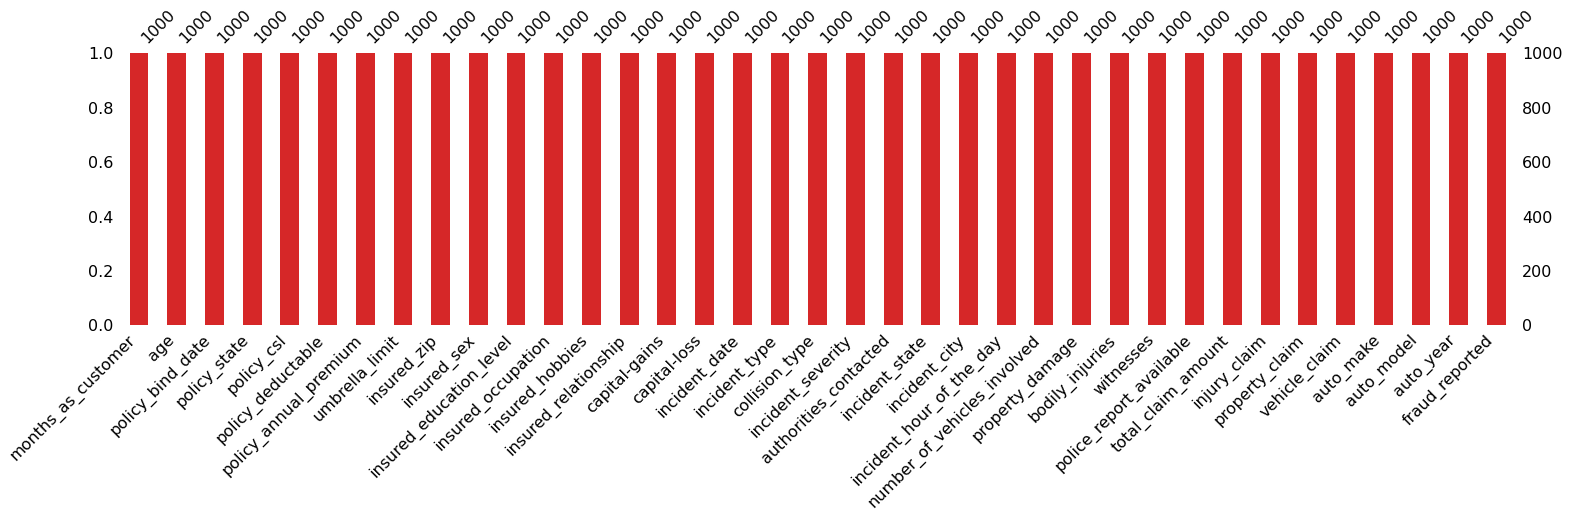

In [14]:
missingno.bar(df, figsize=(25,5), color="tab:red")

Its looks none oof our columns contains null values

In [15]:
print(f"Rows and Columns before dropping duplicates:",df.shape)
df.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates:",df.shape)

Rows and Columns before dropping duplicates: (1000, 37)
Rows and Columns after dropping duplicates: (1000, 37)


We are observe that no duplicates values present in the dataset.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In this method we see that 1 column contains float value and 16 columns with integer and 20 columns with object data type values.

In [17]:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ",object_datatype) 


number_datatype= []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are: ",number_datatype)

Object Data Type Columns are:  ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

Number Data Type Columns are:  ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


We successfully divided the object and number datatype column.

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00


In this method we check the numeric data details.

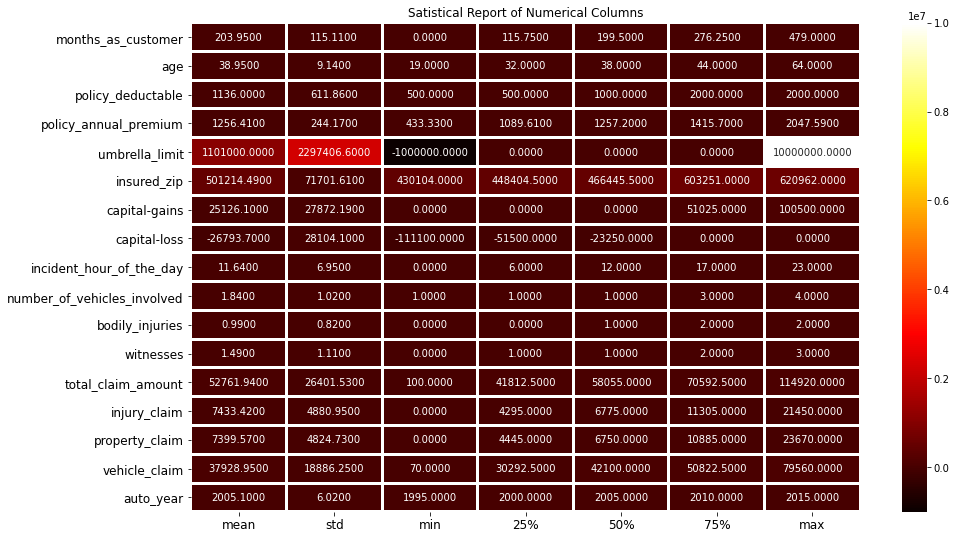

In [19]:
plt.figure(figsize=(15,9))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt=".4f",cmap="hot")
plt.title("Satistical Report of Numerical Columns")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

So the column that stand put the most in terms of values that are present in the column in umbrella_limit.

In [20]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,NaN,NaN,NaN,203.954,115.113174,0.0,115.75,199.5,276.25,479.0
age,1000.0,NaN,NaN,NaN,38.948,9.140287,19.0,32.0,38.0,44.0,64.0
policy_bind_date,1000,951,01-01-2006,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_state,1000,3,OH,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_csl,1000,3,250/500,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_deductable,1000.0,NaN,NaN,NaN,1136.0,611.864673,500.0,500.0,1000.0,2000.0,2000.0
policy_annual_premium,1000.0,NaN,NaN,NaN,1256.40615,244.167395,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,NaN,NaN,NaN,1101000.0,2297406.598118,-1000000.0,0.0,0.0,0.0,10000000.0
insured_zip,1000.0,NaN,NaN,NaN,501214.488,71701.610941,430104.0,448404.5,466445.5,603251.0,620962.0
insured_sex,1000,2,FEMALE,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In this method along with the parameters all to include each and every column present in our dataset irrespecctive of them being numeric and next data.
In this dataset we have details of an automobile insurance policy along with the customer details.

In [21]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*120)

policy_bind_date
01-01-2006    3
05-08-1992    3
28-04-1992    3
14-04-1992    2
09-08-2004    2
             ..
25-08-2011    1
28-11-1991    1
29-10-2006    1
25-05-2002    1
19-06-1992    1
Name: policy_bind_date, Length: 951, dtype: int64
policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cl

Checking the number of rows covered by all the unique value present in our object datatype columns.

In [22]:
df[object_datatype].nunique().to_frame("Unique Values")

,Unique Values
policy_bind_date,951
policy_state,3
policy_csl,3
insured_sex,2
insured_education_level,7
insured_occupation,14
insured_hobbies,20
insured_relationship,6
incident_date,60
incident_type,4


Taking all the unique data values fill our object datatype columns.

In [23]:
df[number_datatype].nunique().to_frame("Unique Values")

,Unique Values
months_as_customer,391
age,46
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995
capital-gains,338
capital-loss,354
incident_hour_of_the_day,24
number_of_vehicles_involved,4


Taking all the unique data values fill our number datatype columns.

DATA PRE PROCESSING

In [24]:
df['policy_bind_date'] =pd.to_datetime(df['policy_bind_date'])
df['policy_bind_Day'] =df['policy_bind_date'].apply(lambda x:x.day)
df['policy_bind_Month'] =df['policy_bind_date'].apply(lambda x:x.month)
df['policy_bind_Year'] =df['policy_bind_date'].apply(lambda x:x.year)

df['incident_date'] =pd.to_datetime(df['incident_date'])
df['incident_Day'] =df['incident_date'].apply(lambda x:x.day)
df['incident_Month'] =df['incident_date'].apply(lambda x:x.month)
df['incident_Year'] =df['incident_date'].apply(lambda x:x.year)

We separated the date object datatype columns into 3 columns in day, month ,year.

In [25]:
df.drop(["policy_bind_date","incident_date"],axis=1,inplace=True)

We have dropped date object type columns we got separated day , month ,year values.

In [26]:
df['collision_type']=df['collision_type'].replace('?','questionable')
df['property_damage']=df['property_damage'].replace('?','questionable')
df['police_report_available']=df['police_report_available'].replace('?','questionable')

Great it looks like no missing values in our dataset.

In [27]:
for col in df:
    percentage = np.round((df[col].isnull().sum()/1000)*100,2)
    print(col,":".format(),percentage,'%')

months_as_customer : 0.0 %
age : 0.0 %
policy_state : 0.0 %
policy_csl : 0.0 %
policy_deductable : 0.0 %
policy_annual_premium : 0.0 %
umbrella_limit : 0.0 %
insured_zip : 0.0 %
insured_sex : 0.0 %
insured_education_level : 0.0 %
insured_occupation : 0.0 %
insured_hobbies : 0.0 %
insured_relationship : 0.0 %
capital-gains : 0.0 %
capital-loss : 0.0 %
incident_type : 0.0 %
collision_type : 0.0 %
incident_severity : 0.0 %
authorities_contacted : 0.0 %
incident_state : 0.0 %
incident_city : 0.0 %
incident_hour_of_the_day : 0.0 %
number_of_vehicles_involved : 0.0 %
property_damage : 0.0 %
bodily_injuries : 0.0 %
witnesses : 0.0 %
police_report_available : 0.0 %
total_claim_amount : 0.0 %
injury_claim : 0.0 %
property_claim : 0.0 %
vehicle_claim : 0.0 %
auto_make : 0.0 %
auto_model : 0.0 %
auto_year : 0.0 %
fraud_reported : 0.0 %
policy_bind_Day : 0.0 %
policy_bind_Month : 0.0 %
policy_bind_Year : 0.0 %
incident_Day : 0.0 %
incident_Month : 0.0 %
incident_Year : 0.0 %


W e have no missing values present in our dataset.

In [28]:
df.nunique().to_frame("Unique Values")

,Unique Values
months_as_customer,391
age,46
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995
insured_sex,2
insured_education_level,7


I am taking all the unique values present in our column and i see that incident_Year have unique value 1 filling with data can be dropped .

In [29]:
df.drop(["incident_Year"],axis=1,inplace=True)

Visualization

Single digit category column name: policy_state


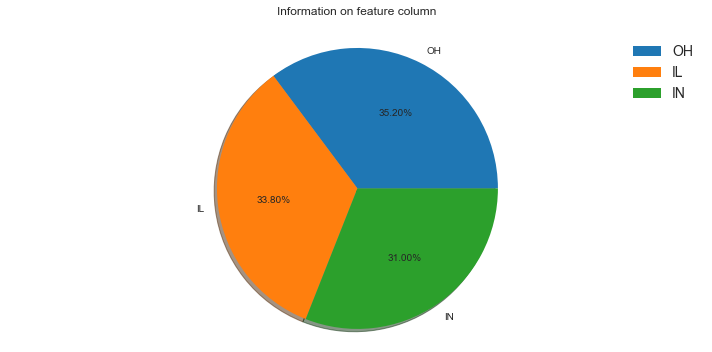

Single digit category column name: policy_csl


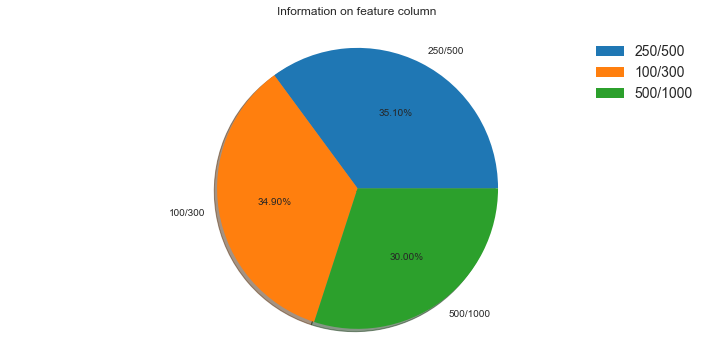

Single digit category column name: insured_sex


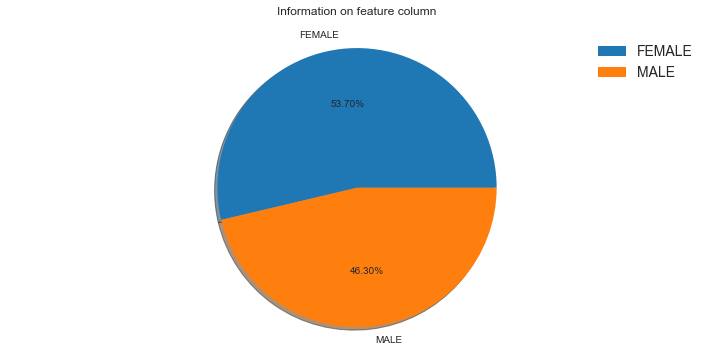

Single digit category column name: insured_education_level


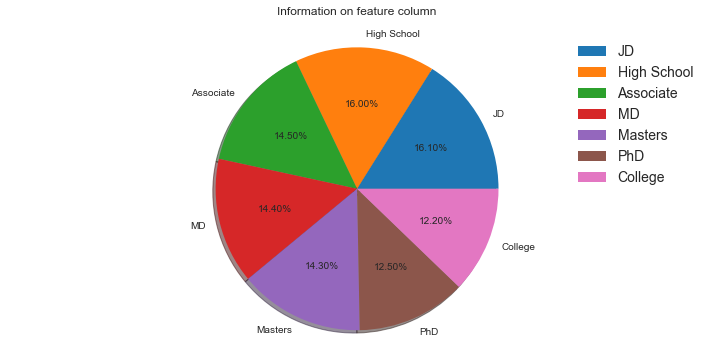

Single digit category column name: policy_deductable


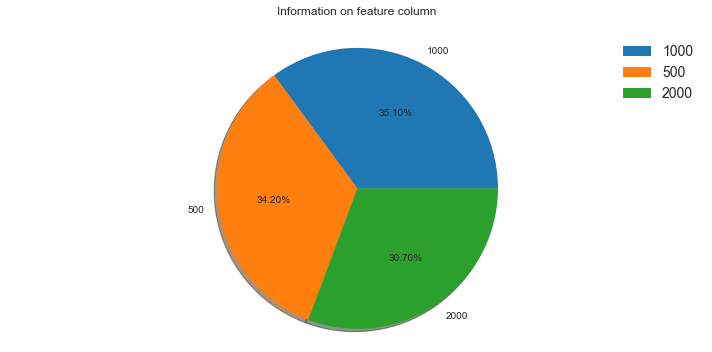

Single digit category column name: insured_relationship


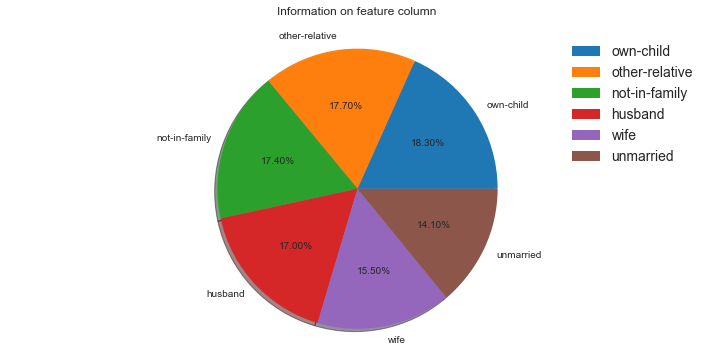

Single digit category column name: incident_type


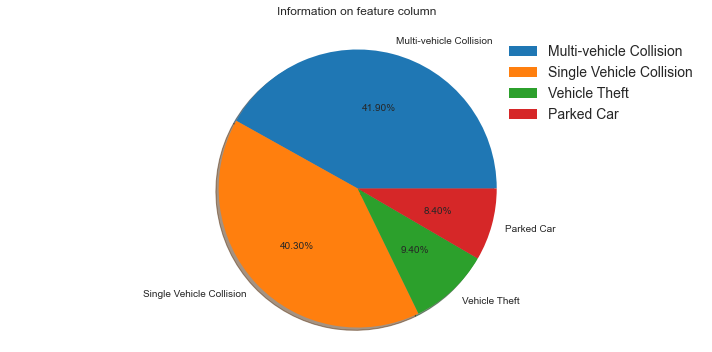

Single digit category column name: collision_type


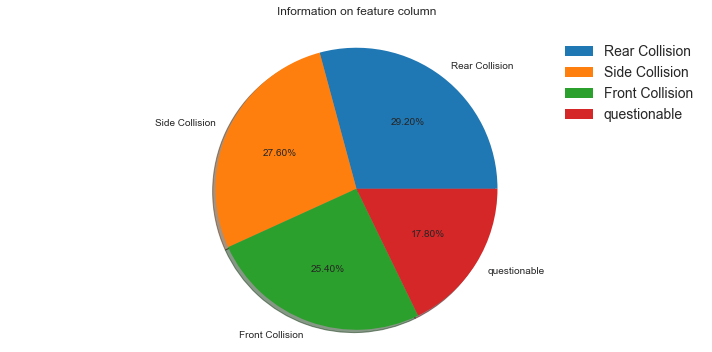

Single digit category column name: incident_severity


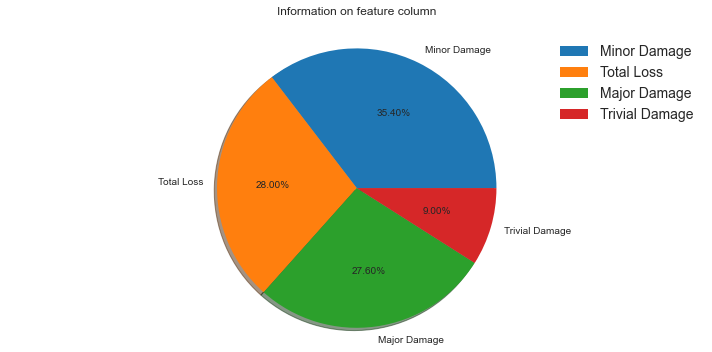

Single digit category column name: authorities_contacted


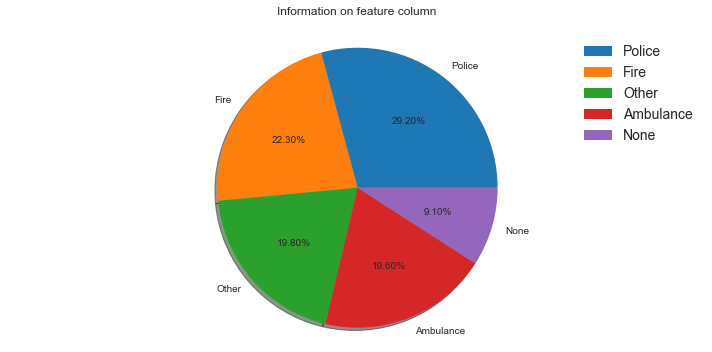

Single digit category column name: incident_state


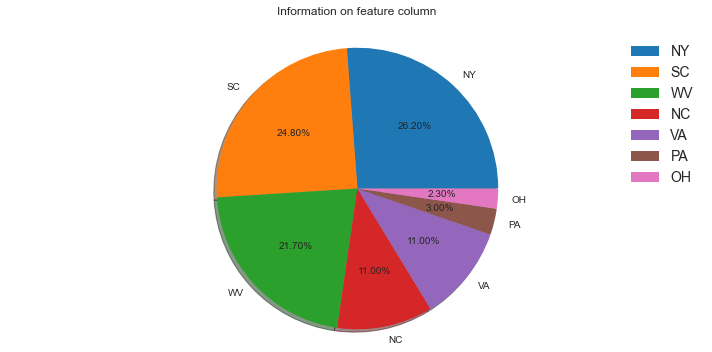

Single digit category column name: incident_city


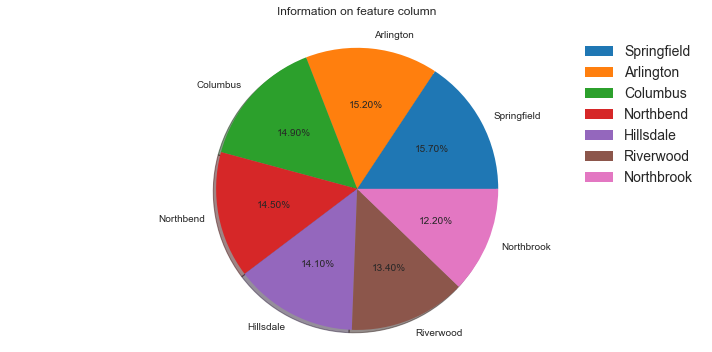

Single digit category column name: witnesses


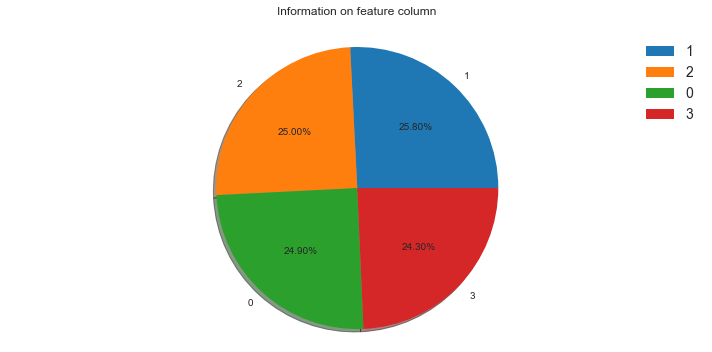

Single digit category column name: bodily_injuries


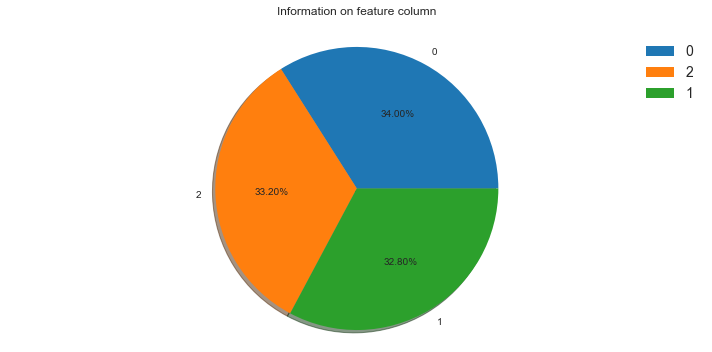

Single digit category column name: property_damage


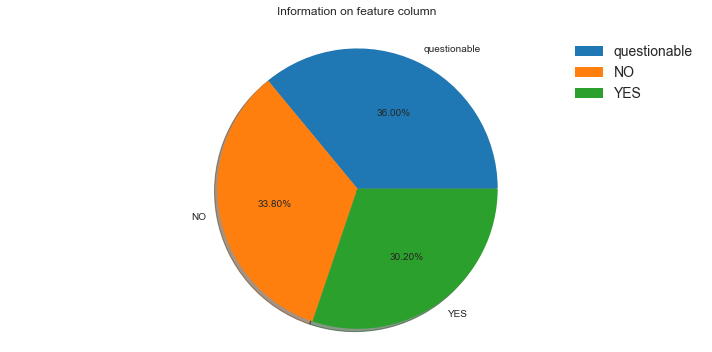

Single digit category column name: police_report_available


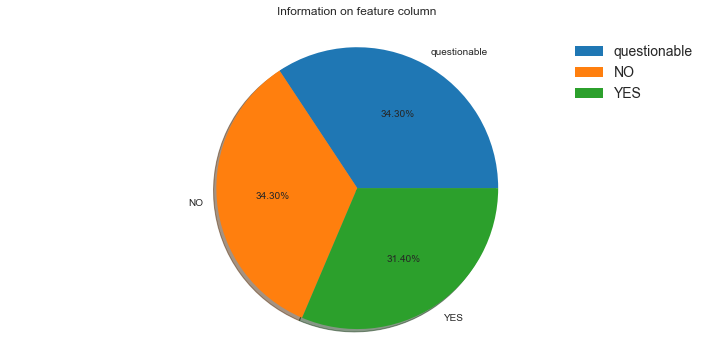

Single digit category column name: fraud_reported


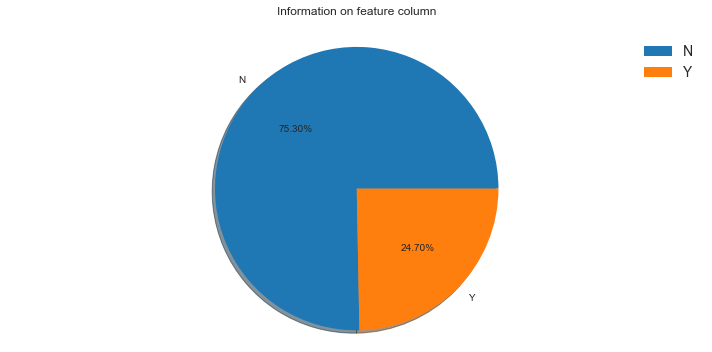

Single digit category column name: number_of_vehicles_involved


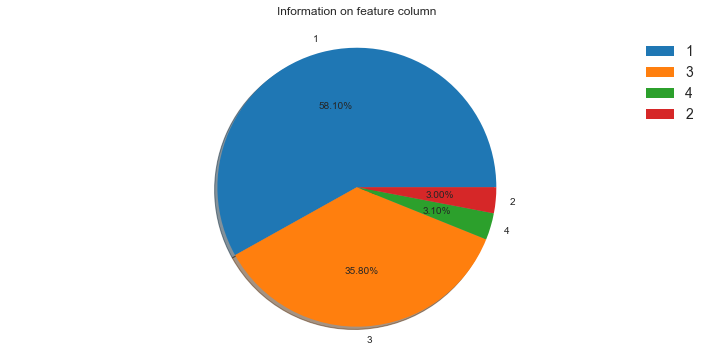

In [30]:
def generate_pie(x):
    plt.style.use('seaborn-white')
    plt.figure(figsize=(10,5))
    plt.pie(x.value_counts(),labels=x.value_counts().index,shadow=True, autopct='%1.2f%%')
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.title('Information on feature column\n')
    plt.tight_layout()
    return plt.show()
col1 = [ 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level','policy_deductable',
          'insured_relationship',  'incident_type', 'collision_type', 'incident_severity',
        'authorities_contacted', 'incident_state', 'incident_city','witnesses','bodily_injuries',
        'property_damage', 'police_report_available',  'fraud_reported','number_of_vehicles_involved']

for i in df[col1]:
    print(f"Single digit category column name:",i)
    generate_pie(df[i])

In the above pie plot we can see that categorical data distribution among the daatset rows covering a single set number of data points in each value.
1.we can see that less number of data cover the the yes portion of fraud reported and since this our target label it indicates towards the problem incase imbalance as well.
2.we can see that almost both male and female  have insurancebut the data coveragefor female is a bit higher than theirmale counterparts.
3.for policy state ohio has a larger chunk of data. as compared to llinois and indian but all 3 have pretty much similar data points.
4.with respect to policy deductable criteria we can see 1000 to be a higher rate than its 500 and 2000 data counterparts
5.in terns of boody injuries the severity for level 0 is slightly higher thanlevel 2 and 1
6.for police report availability only 31.40 percentage people were able to produce genunine reports while the remaining 34.40 percentage were either unable to show a report
7.when checking for property damage data we see that 36 percent of the information is questionable with 33.80 percent people did not face any property damage 
8.when we check for accident type then single vechile and multi vechile collision have covered more than 40 percent dat each .
9.for collision type category we see 29.20 percent incident vehciles with rear collision which is like the highest 
10.measuring the incident servity the highest category covers for minor damages with 35.40 percent
11.for number of vechiles being involved in an incident majority  lies for 1 and 3.
12.when we check for witness secton then all the categories of witness are almost similarity distributed
13.the data on whether an authority was contracted after an incident covers the police being notified the most.
14.again for insuredrelationship column i see almost all the categorical value equally amongst all the categorical vale
15.similar insured relationship even insured education level column has its data rows distributed equally amongst
all the categorical values
17.for incident state column i see major portion of data rows are covered by new york , carolina,west virginia state
18.while checking for incident related city all the cities that are listed in the column have an equal coverage 

Double digit category column name: umbrella_limit


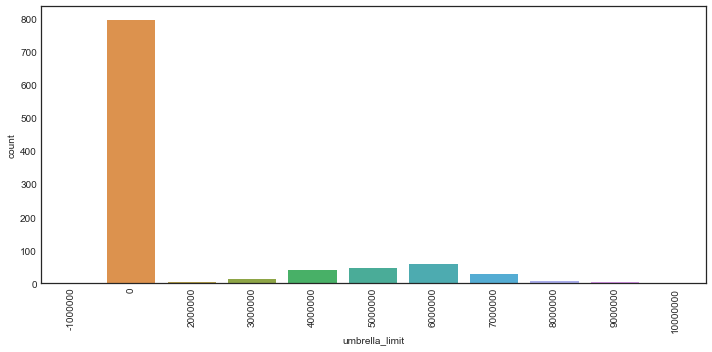

Double digit category column name: insured_occupation


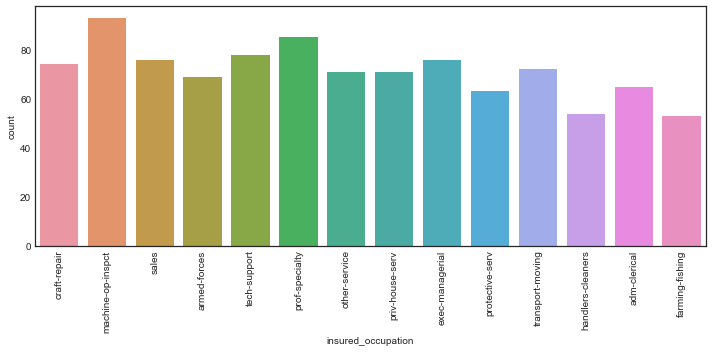

Double digit category column name: auto_make


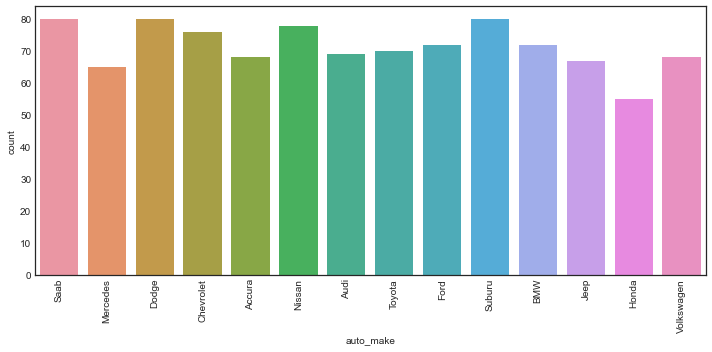

Double digit category column name: insured_hobbies


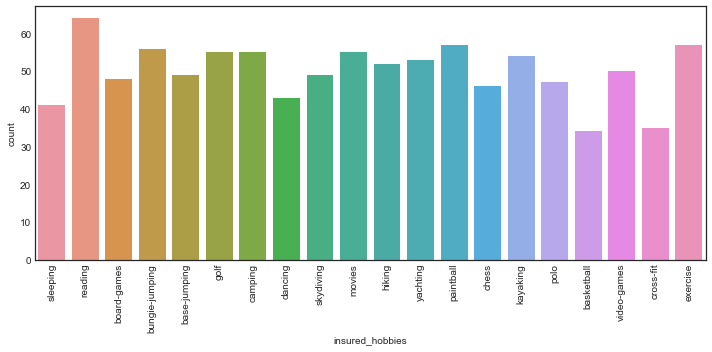

Double digit category column name: auto_model


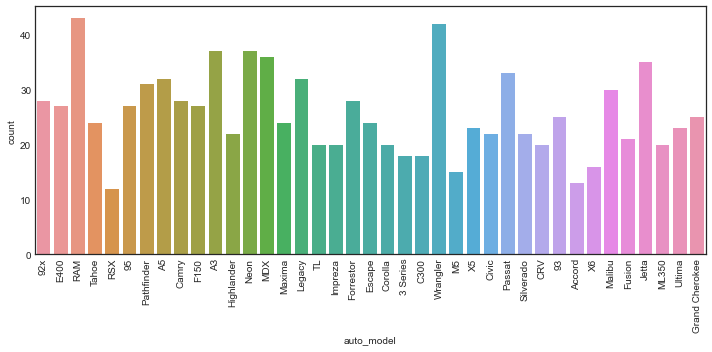

In [31]:
def generate_countplot(x):
    plt.figure(figsize=(10,5))
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()

col2 = ['umbrella_limit','insured_occupation','auto_make','insured_hobbies','auto_model']

for j in df[col2]:
    print(f"Double digit category column name:",j)
    generate_countplot(df[j])

in the above observation countplot we can see the categorical data distribution among the datset rows covering double digit category set number of data points for each value
.we see that the umbrella limit is the highest for the number 0 than any other value listed in that column
.with respect to occupation of all the insured people we see the highest data coverage by machine  operation .inspector and professional speciality designation 
taking a look at vechile companies we acn see a higher scale of data for saab,dodge,nissan,suburu and volkswagen
.if we take a look at the vechiles models that were registered for incident then we see lots of data rows covered by RAM and wrangler automobiles model

policy_state vs fraud_reported column _>


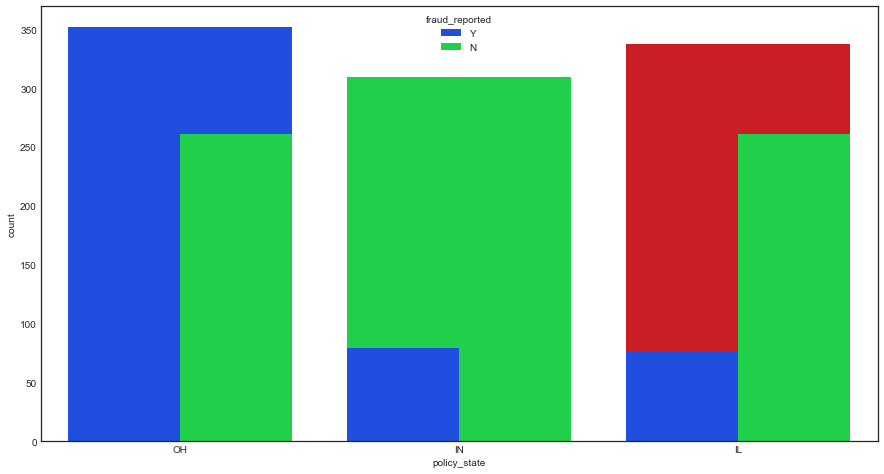

policy_csl vs fraud_reported column _>


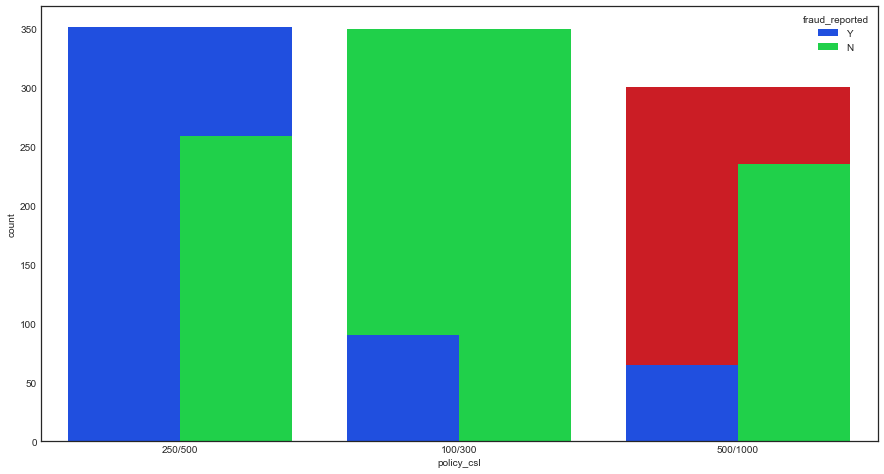

insured_sex vs fraud_reported column _>


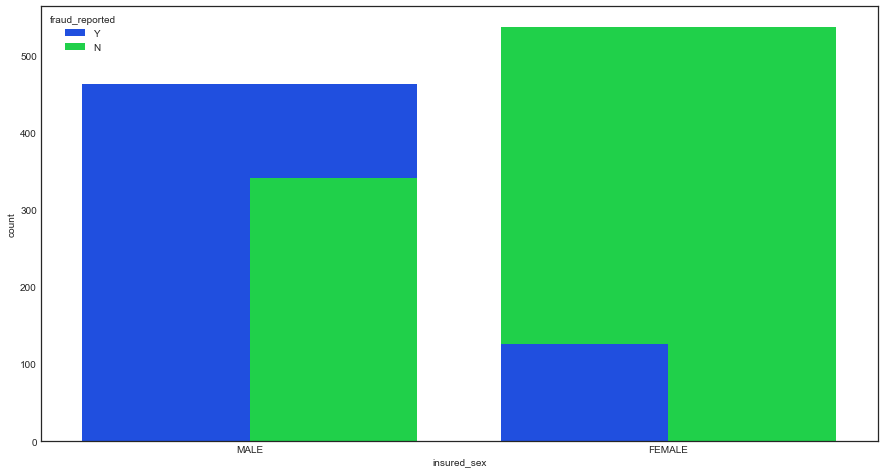

insured_education_level vs fraud_reported column _>


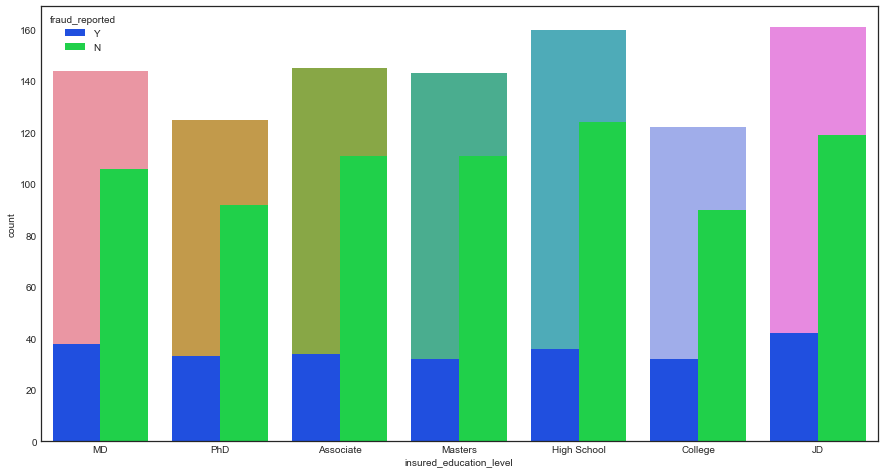

policy_deductable vs fraud_reported column _>


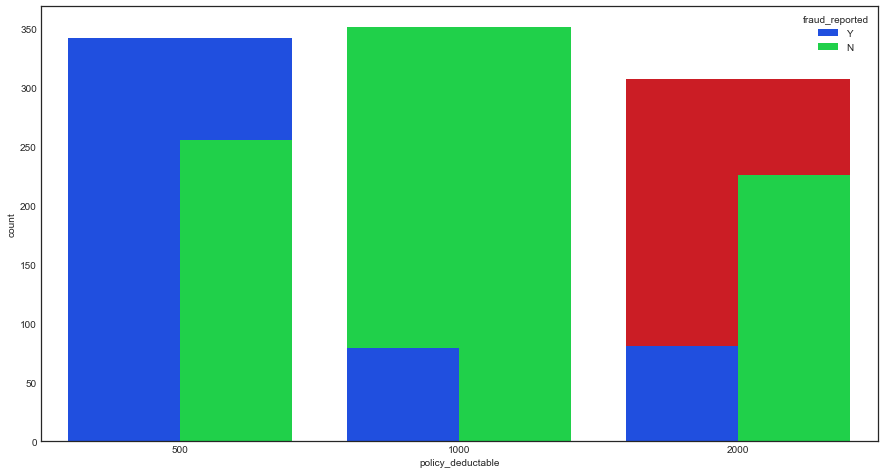

insured_relationship vs fraud_reported column _>


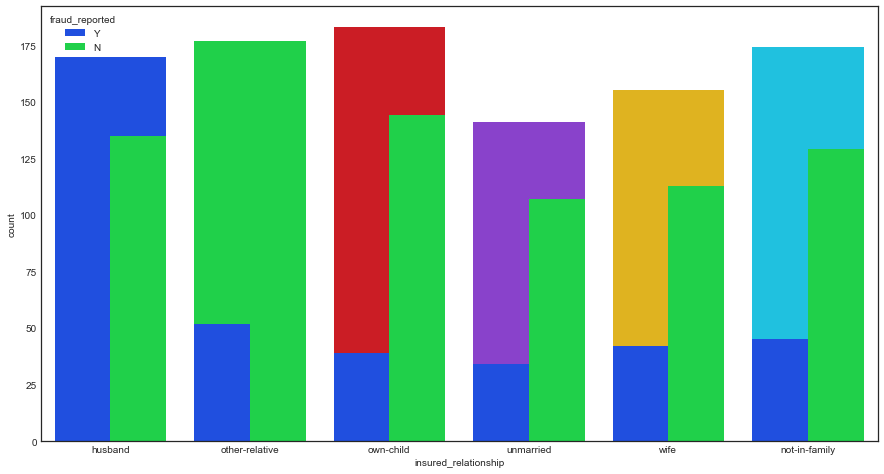

incident_type vs fraud_reported column _>


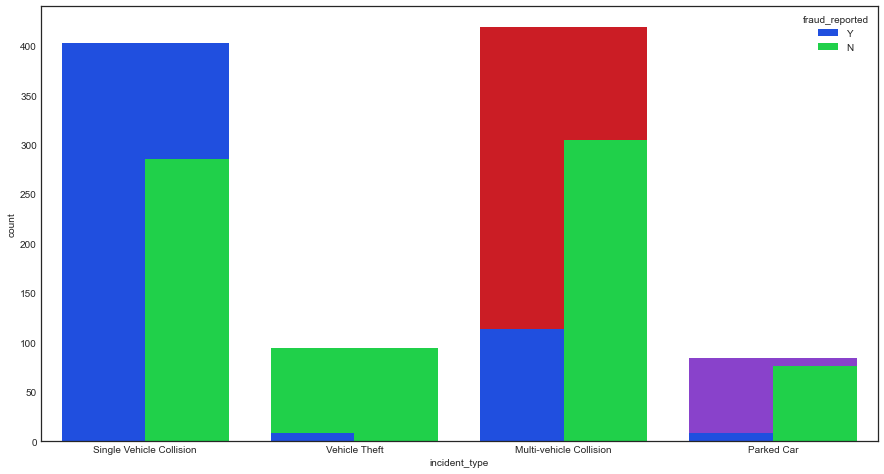

collision_type vs fraud_reported column _>


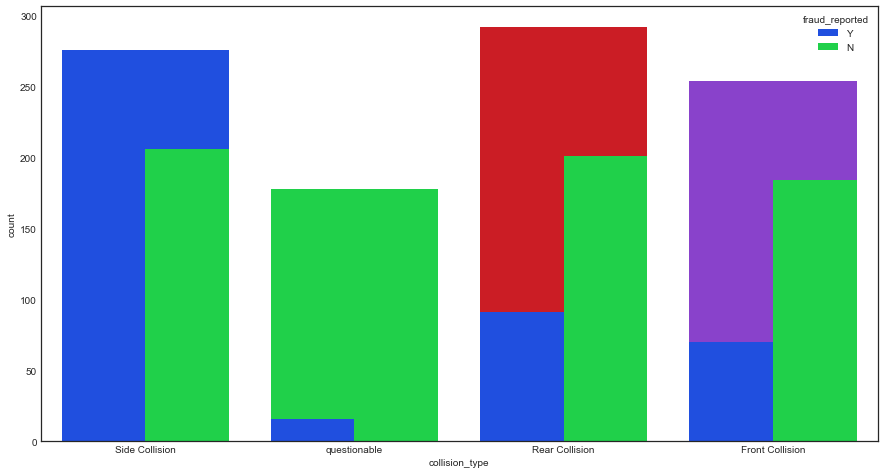

incident_severity vs fraud_reported column _>


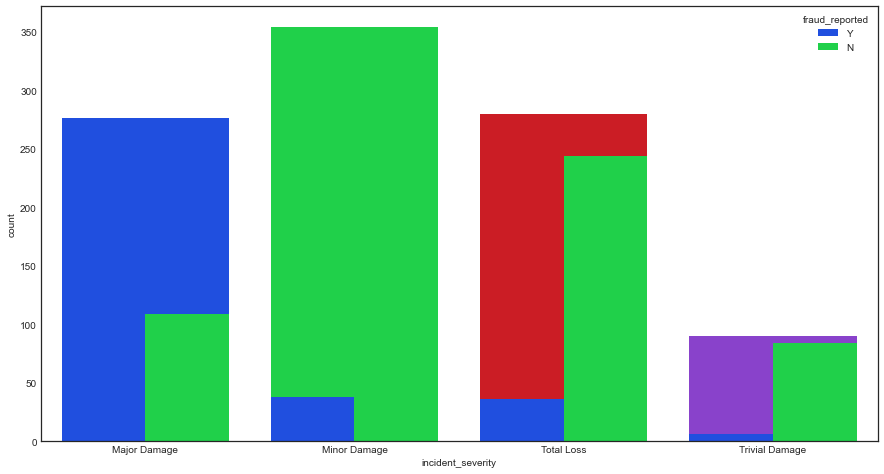

authorities_contacted vs fraud_reported column _>


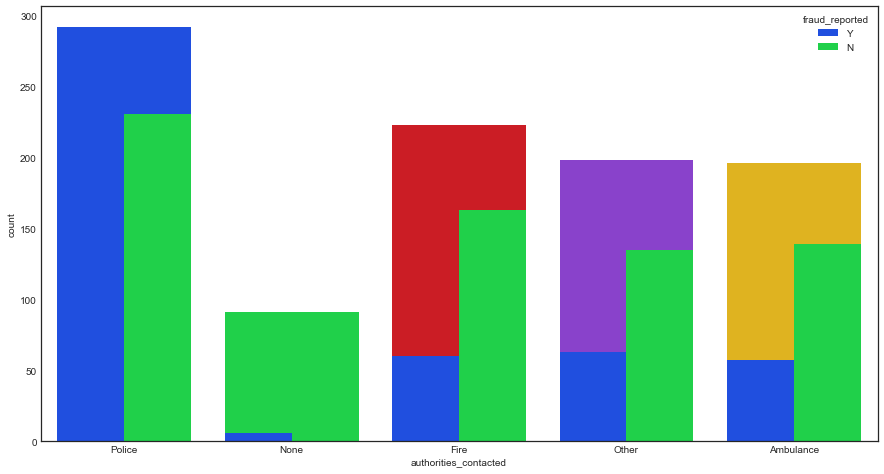

incident_state vs fraud_reported column _>


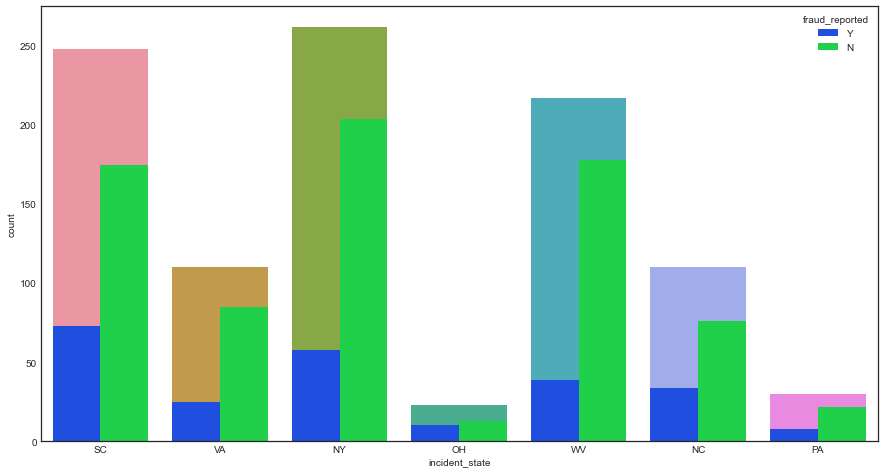

incident_city vs fraud_reported column _>


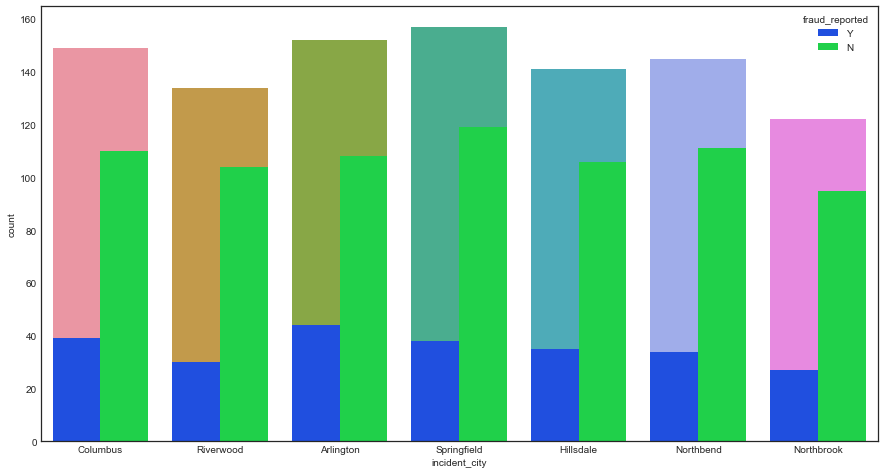

witnesses vs fraud_reported column _>


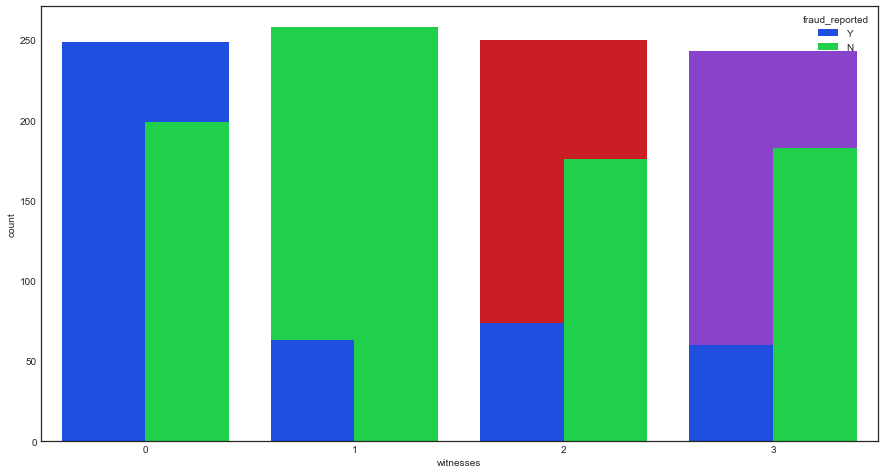

bodily_injuries vs fraud_reported column _>


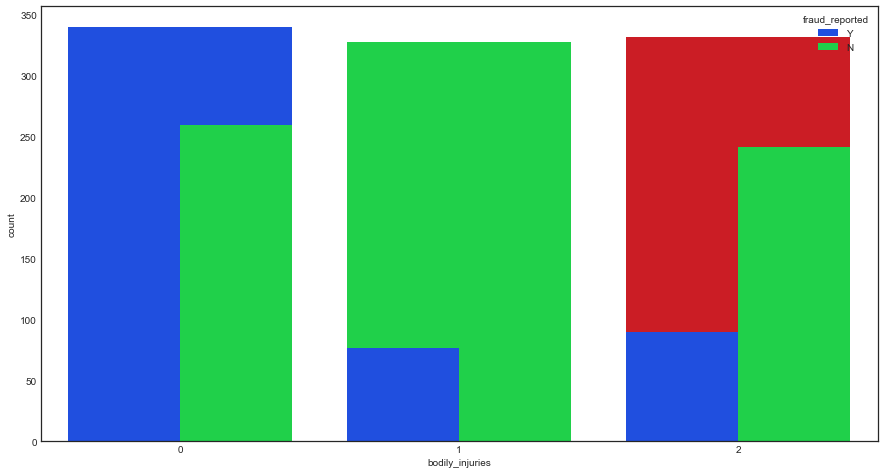

property_damage vs fraud_reported column _>


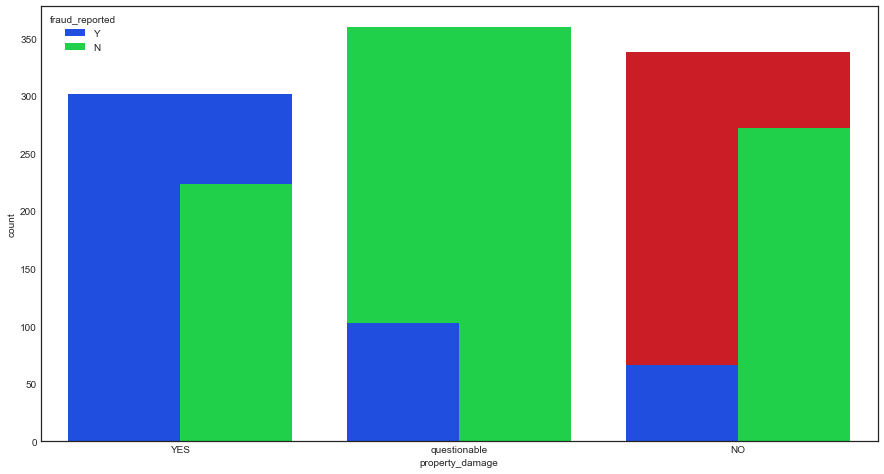

police_report_available vs fraud_reported column _>


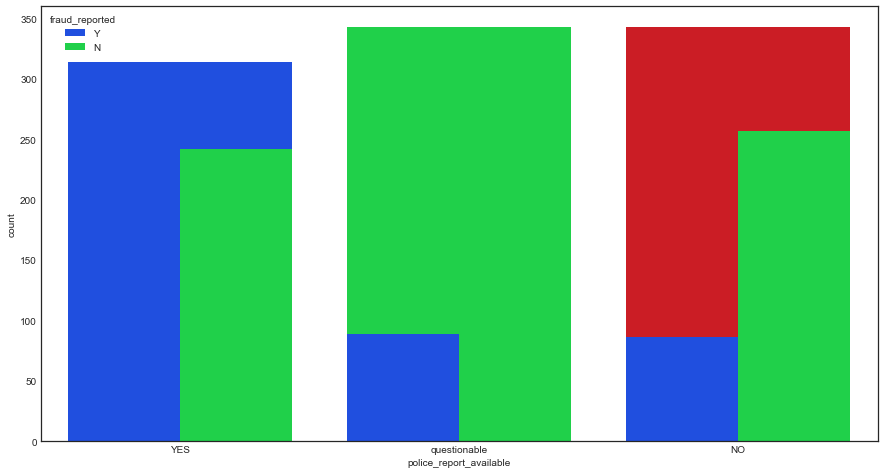

number_of_vehicles_involved vs fraud_reported column _>


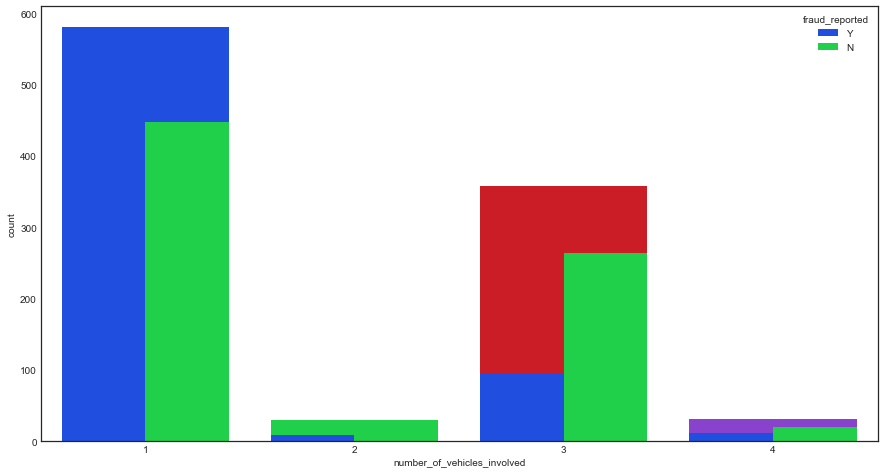

policy_state vs fraud_reported column _>


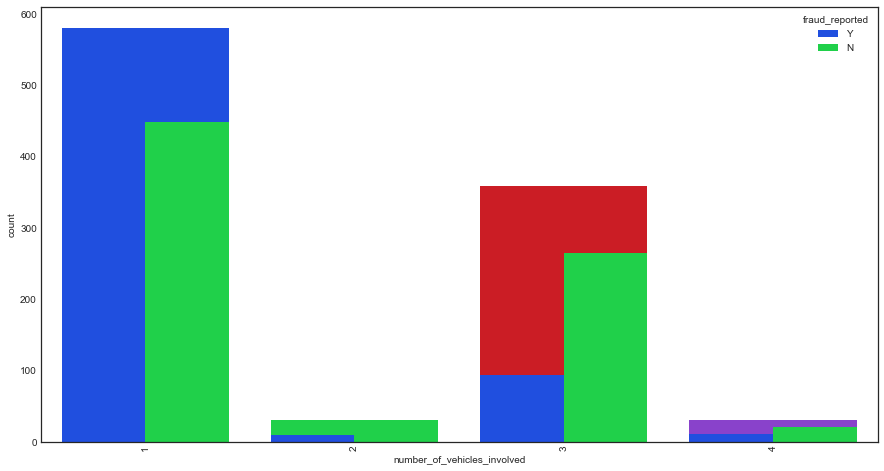

policy_csl vs fraud_reported column _>


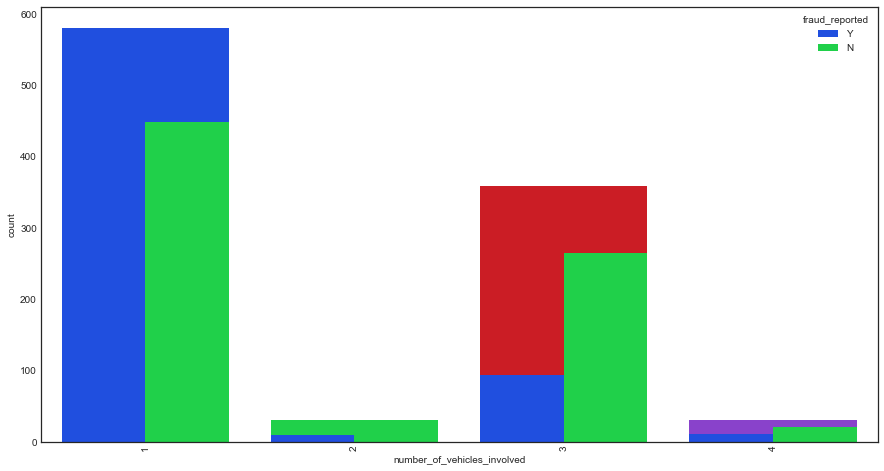

insured_sex vs fraud_reported column _>


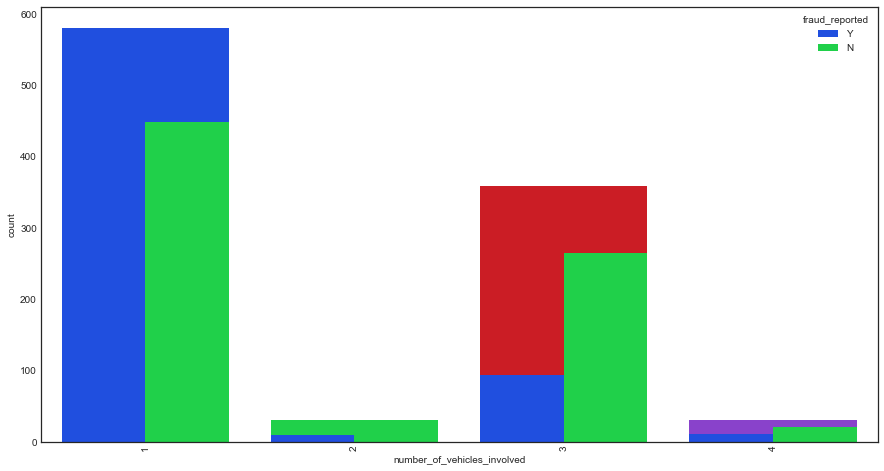

insured_education_level vs fraud_reported column _>


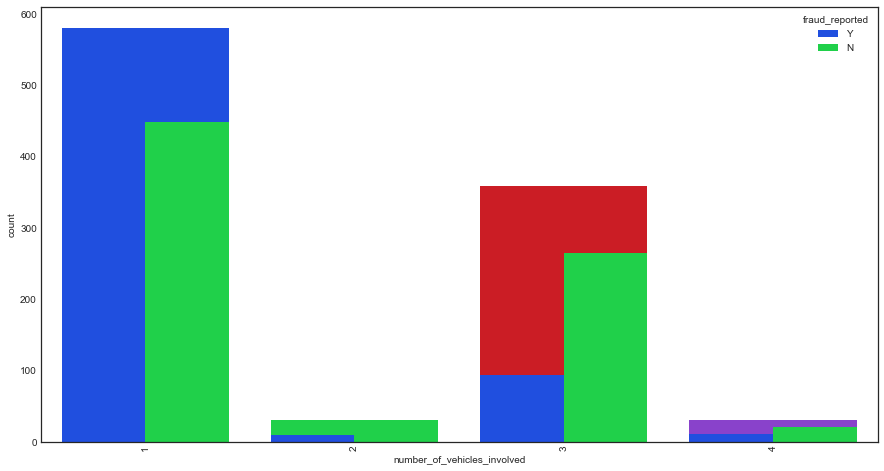

policy_deductable vs fraud_reported column _>


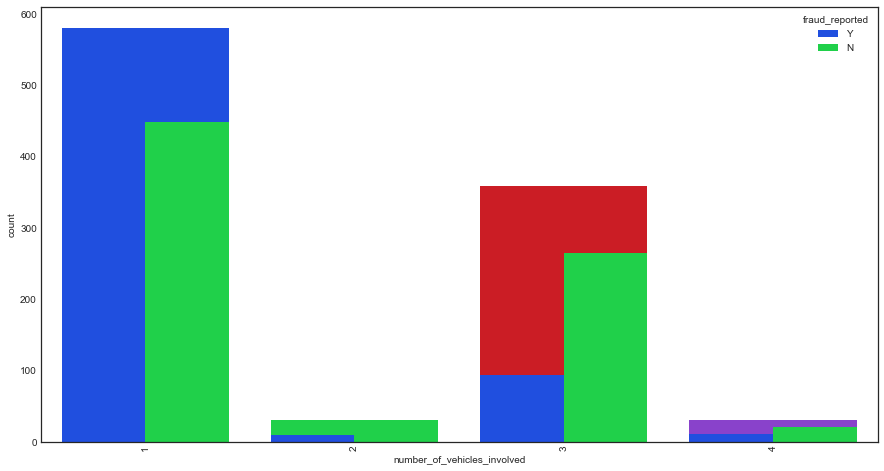

insured_relationship vs fraud_reported column _>


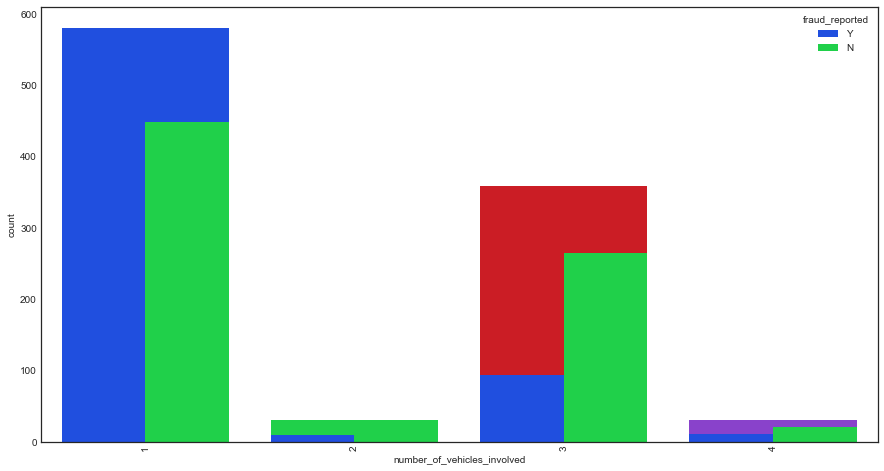

incident_type vs fraud_reported column _>


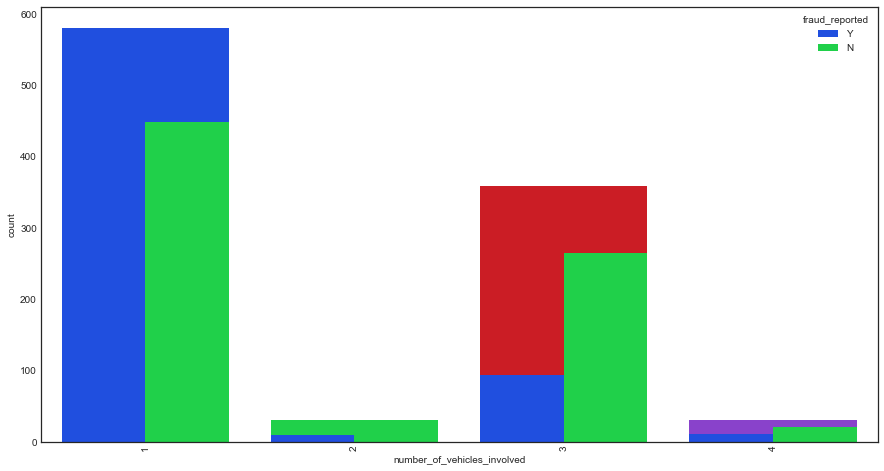

collision_type vs fraud_reported column _>


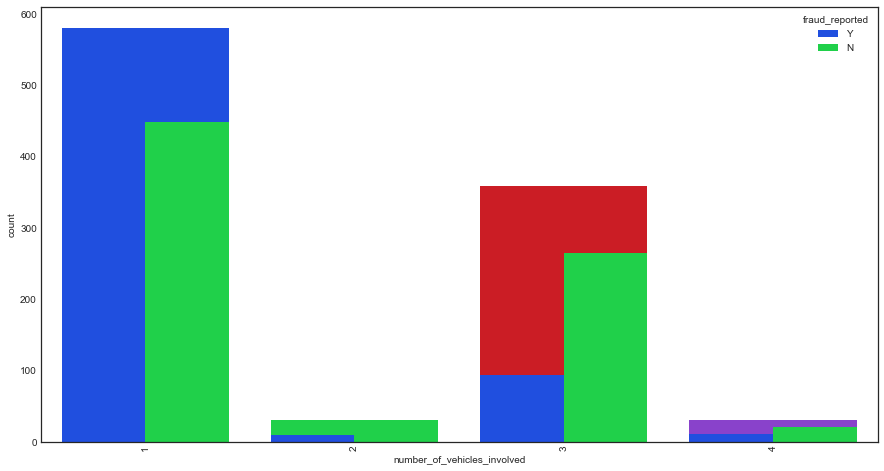

incident_severity vs fraud_reported column _>


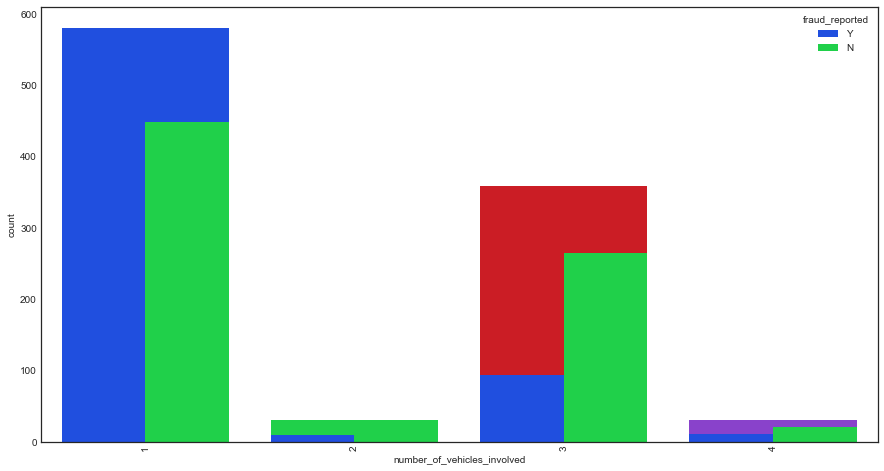

authorities_contacted vs fraud_reported column _>


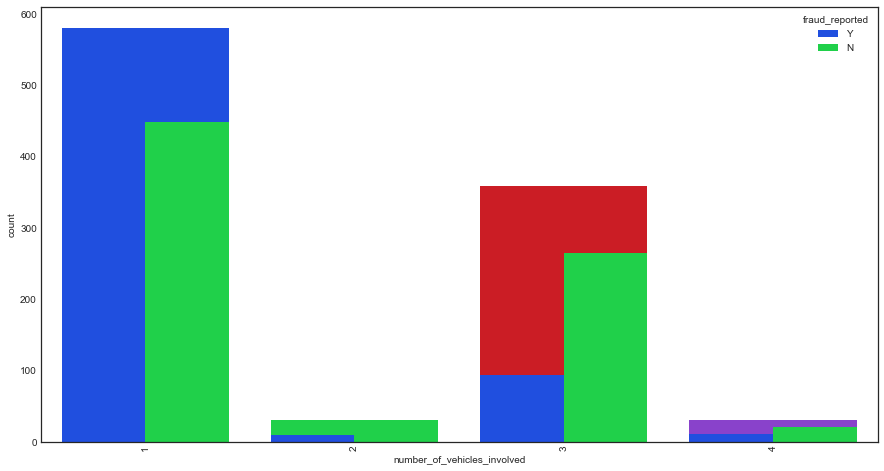

incident_state vs fraud_reported column _>


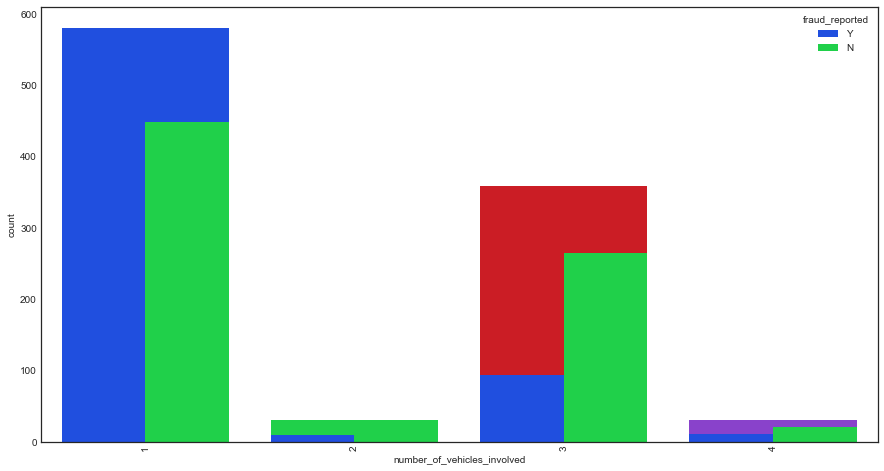

incident_city vs fraud_reported column _>


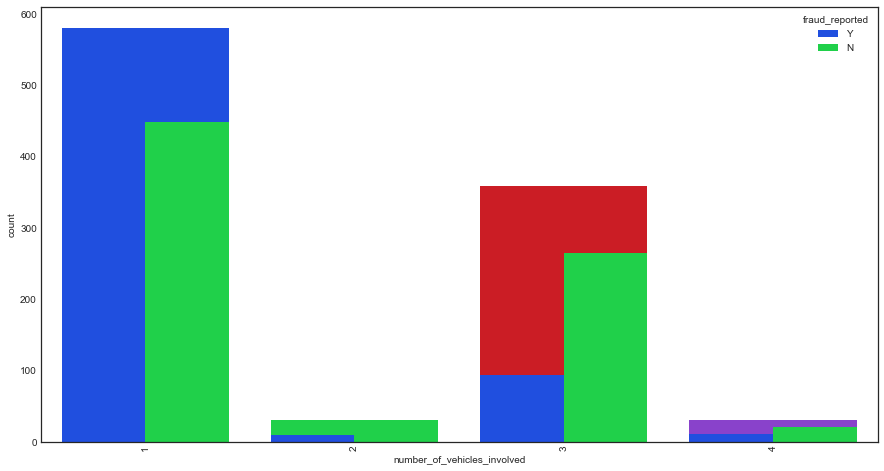

witnesses vs fraud_reported column _>


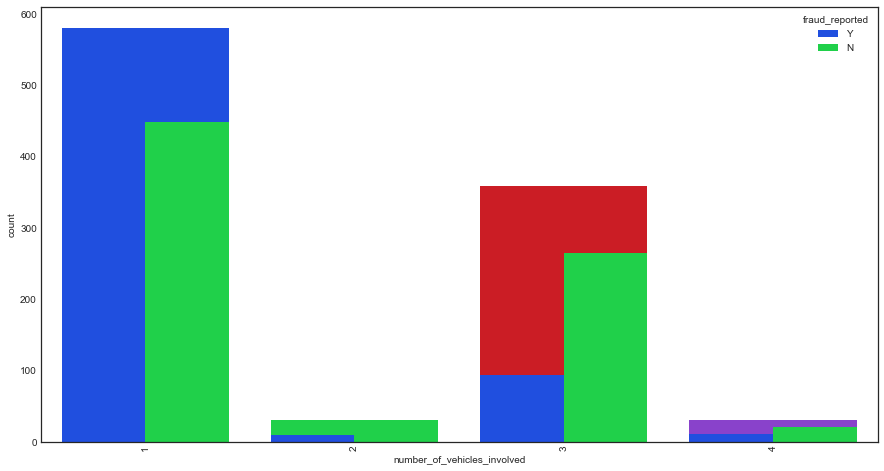

bodily_injuries vs fraud_reported column _>


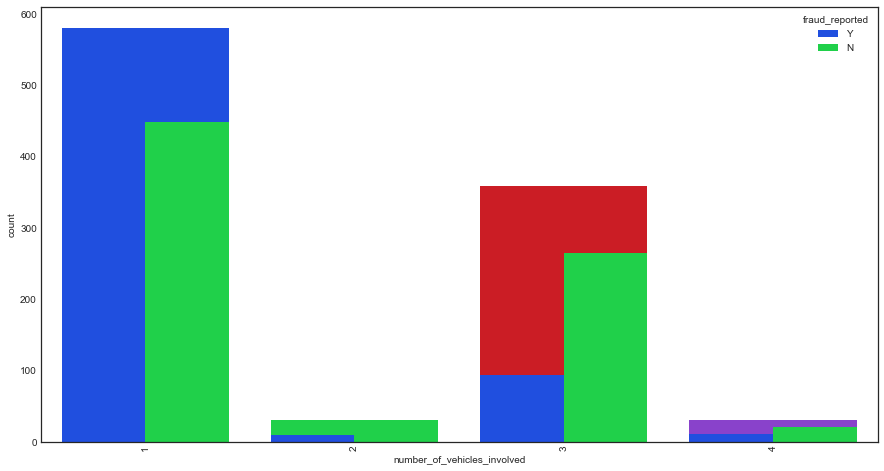

property_damage vs fraud_reported column _>


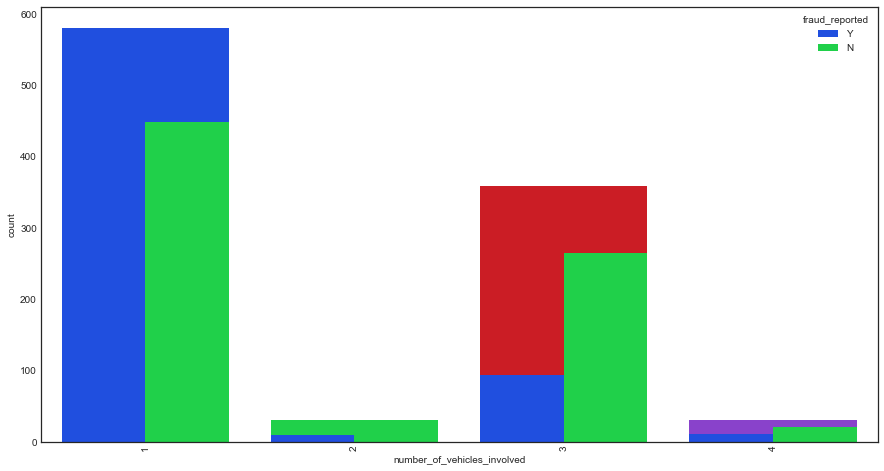

police_report_available vs fraud_reported column _>


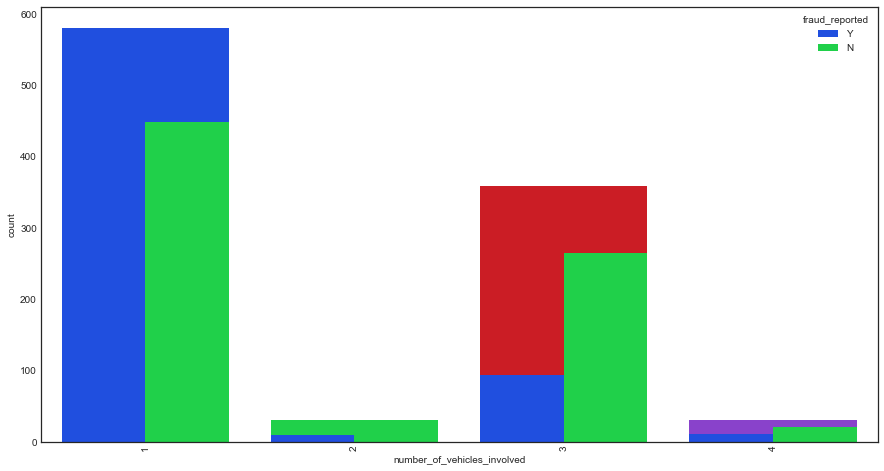

number_of_vehicles_involved vs fraud_reported column _>


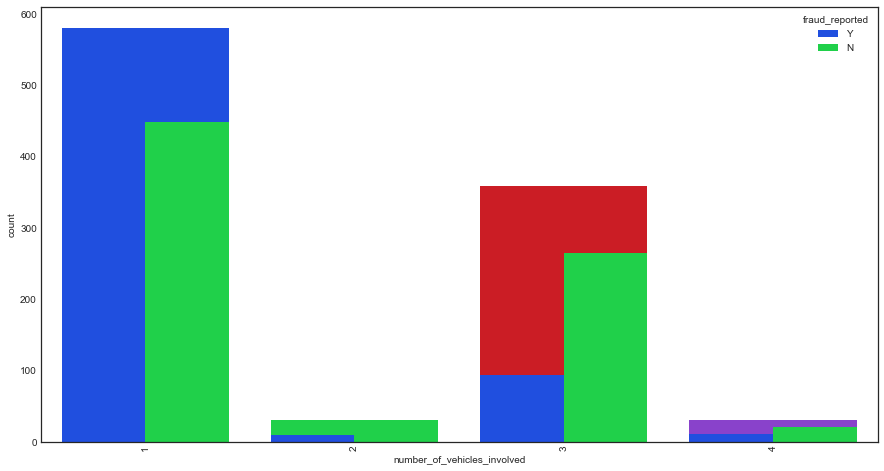

In [32]:
plt.style.use('seaborn-bright')

col1.remove("fraud_reported")

for k in df[col1]:
    plt.figure(figsize=(15,8))
    print(f"{k} vs fraud_reported column _>")
    sns.countplot(df[k])
    sns.countplot(df[k],hue=df['fraud_reported'])
    plt.show()
    
for l in df[col1]:
    plt.figure(figsize=(15,8))
    print(f"{l} vs fraud_reported column _>")
    sns.countplot(df[k])
    sns.countplot(df[k],hue=df['fraud_reported'])
    plt.xticks(rotation=90)
    plt.show()

In the above countplot we vistualize all the feature column with respect to the target column

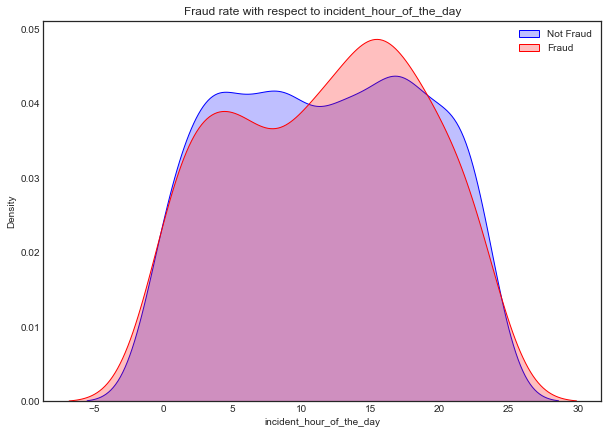

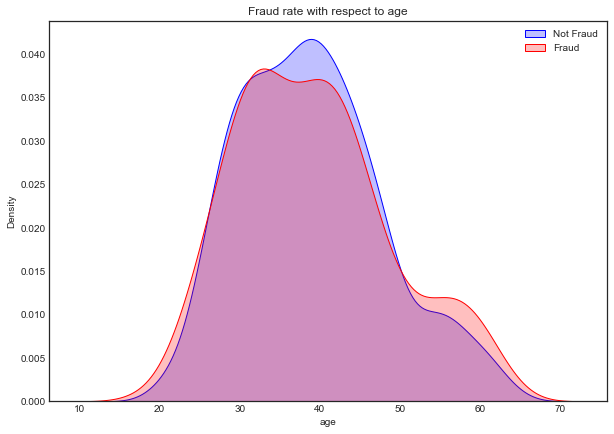

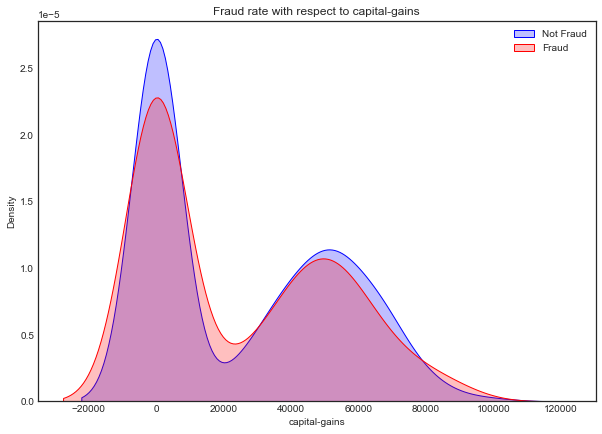

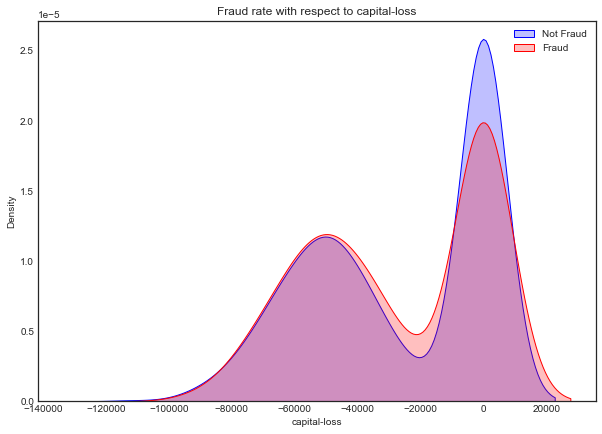

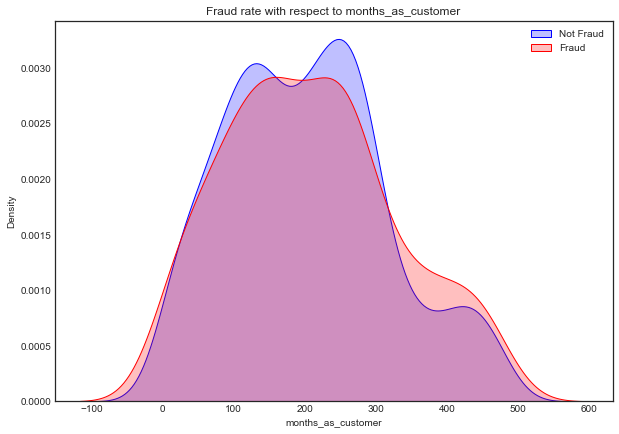

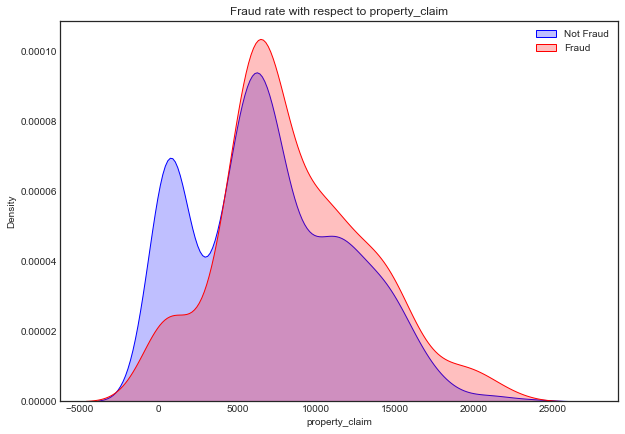

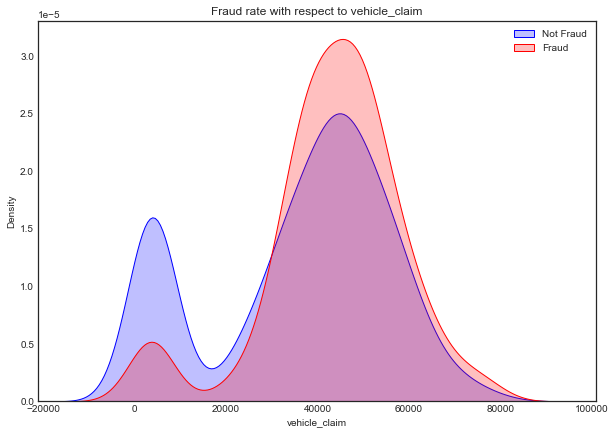

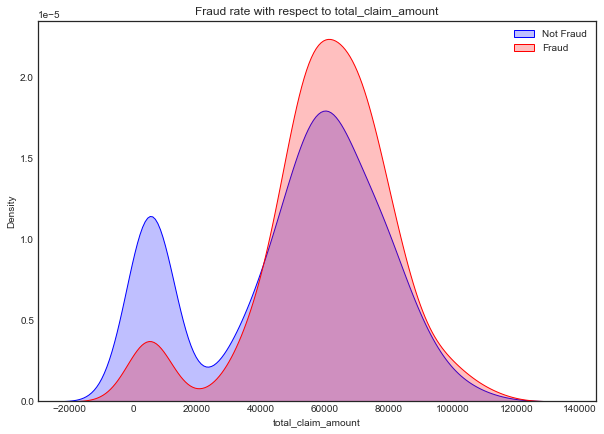

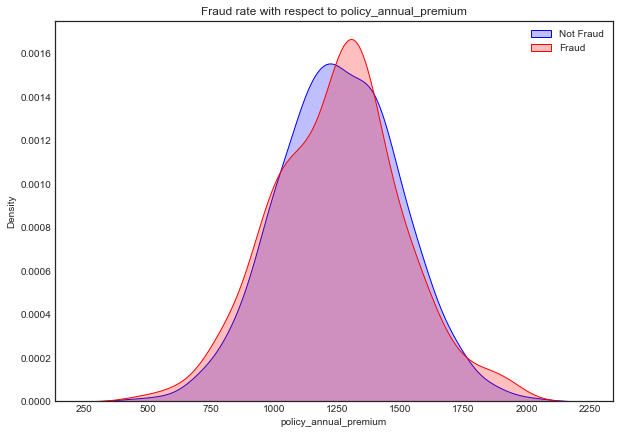

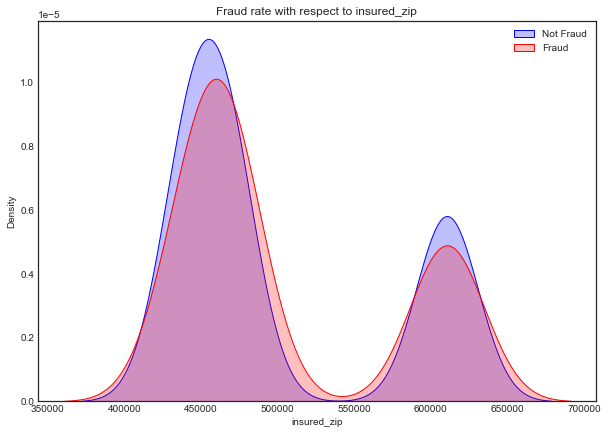

In [33]:
col3 =['incident_hour_of_the_day','age','capital-gains','capital-loss','months_as_customer',
      'property_claim','vehicle_claim','total_claim_amount','policy_annual_premium','insured_zip']

for z in df[col3]:
    plt.figure(figsize=(10,7))
    ax=sns.kdeplot(df.loc[(df['fraud_reported']=='N'),z],color='b',shade=True,label='Not Fraud')
    ax=sns.kdeplot(df.loc[(df['fraud_reported']=='Y'),z],color='r',shade=True,label='Fraud')
    plt.title('Fraud rate with respect to {}'.format(z))
    plt.legend()
    plt.show()

cover visualization of all the columns wrt target column

In [34]:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ",object_datatype)

object_datatype.remove('fraud_reported')
object_datatype

Object Data Type Columns are:  ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model']

I have removed the label column from our categorical column list so that we can use label encoder on the target column and ordinal encoder on the feature column properly

Encoding the categorical datatype columns

In [35]:
le = LabelEncoder()
df["fraud_reported"] = le.fit_transform(df["fraud_reported"])
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1,17,10,2014,25,1
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,questionable,Minor Damage,Police,VA,Riverwood,8,1,questionable,0,0,questionable,5070,780,780,3510,Mercedes,E400,2007,1,27,6,2006,21,1
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,9,6,2000,22,2
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,questionable,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,25,5,1990,1,10
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,questionable,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0,6,6,2014,17,2


In [36]:
oe = OrdinalEncoder()
def ordinal_encoder(df,column):
    df[column]=oe.fit_transform(df[column])
    return df

df=ordinal_encoder(df,object_datatype)
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month
0,328,48,2.0,1.0,1000,1406.91,0,466132,1.0,4.0,2.0,17.0,0.0,53300,0,2.0,2.0,0.0,4.0,4.0,1.0,5,1,1.0,1,2,1.0,71610,6510,13020,52080,10.0,1.0,2004,1,17,10,2014,25,1
1,228,42,1.0,1.0,2000,1197.22,5000000,468176,1.0,4.0,6.0,15.0,2.0,0,0,3.0,3.0,1.0,4.0,5.0,5.0,8,1,2.0,0,0,2.0,5070,780,780,3510,8.0,12.0,2007,1,27,6,2006,21,1
2,134,29,2.0,0.0,2000,1413.14,5000000,430632,0.0,6.0,11.0,2.0,3.0,35100,0,0.0,1.0,1.0,4.0,1.0,1.0,7,3,0.0,2,3,0.0,34650,7700,3850,23100,4.0,30.0,2007,0,9,6,2000,22,2
3,256,41,0.0,1.0,2000,1415.74,6000000,608117,0.0,6.0,1.0,2.0,4.0,48900,-62400,2.0,0.0,0.0,4.0,2.0,0.0,5,1,2.0,1,2,0.0,63400,6340,6340,50720,3.0,34.0,2014,1,25,5,1990,1,10
4,228,44,0.0,2.0,1000,1583.91,6000000,610706,1.0,0.0,11.0,2.0,4.0,66000,-46000,3.0,3.0,1.0,2.0,1.0,0.0,20,1,0.0,0,1,0.0,6500,1300,650,4550,0.0,31.0,2009,0,6,6,2014,17,2


 I have used oridnal encoder inside a function to loop through all the categorical data columns except our label and convert those feature values from object values

In [37]:
print(f"Shape of our data frame post encoding is",df.shape)
df.isnull().sum()

Shape of our data frame post encoding is (1000, 40)


months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

We see that no null values present in our dataset

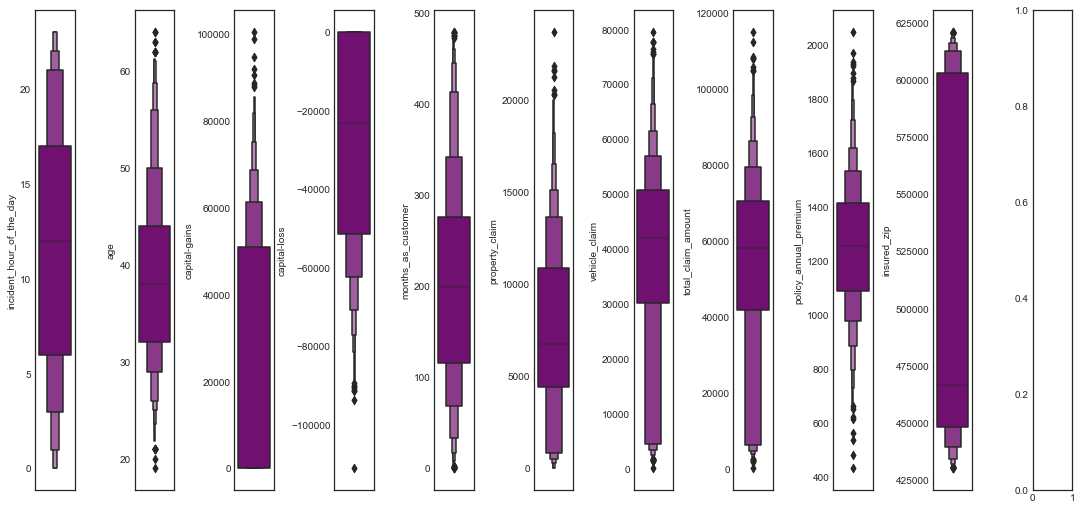

In [38]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=11, nrows=1, figsize=(15,7))
index = 0
ax = ax.flatten()
for col, value in df[col3].items():
    sns.boxenplot(y=col, data=df, ax=ax[index], color="purple")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

WITH THE HELP OF BOXENPLOT WE SEE THE OUTLIERS PRESENT IN OUR CATEGORICAL COLUMN

In [39]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                 0.126539
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage               -0.041341
bodily_injuries                0.014777


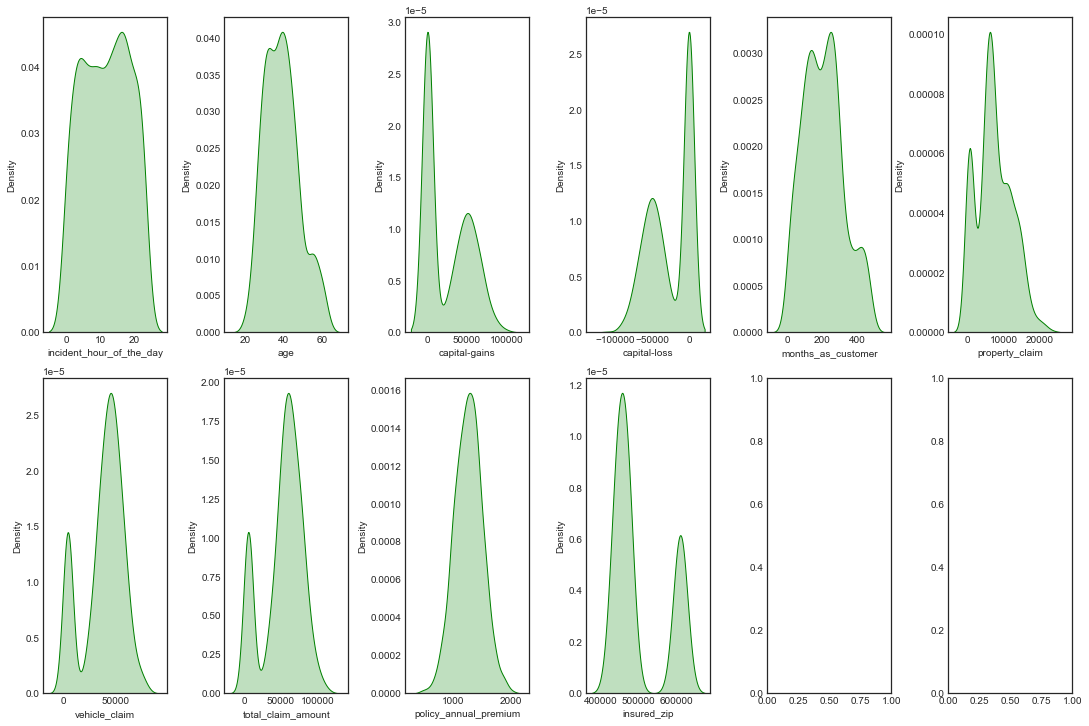

In [40]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df[col3].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade":True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

With the help of distribution plot we can see the skewnessdetails present in our numerical data columns which will need to be treated

Using zscore to remove outliers

In [41]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print("Shape of the dataframe before removing outliers",df.shape)
print("Shape of the dataframe after removing outliers",df1.shape)
print("Percentage of data loss post outliers removal", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers (1000, 40)
Shape of the dataframe after removing outliers (980, 40)
Percentage of data loss post outliers removal 2.0


I have using the z score technique to remove outliers and percentage of data loss is 2.0 .

USING LOG TRANSFORM TO FIX SKEWNESS

In [42]:
for col in number_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

Corelation using heatmap

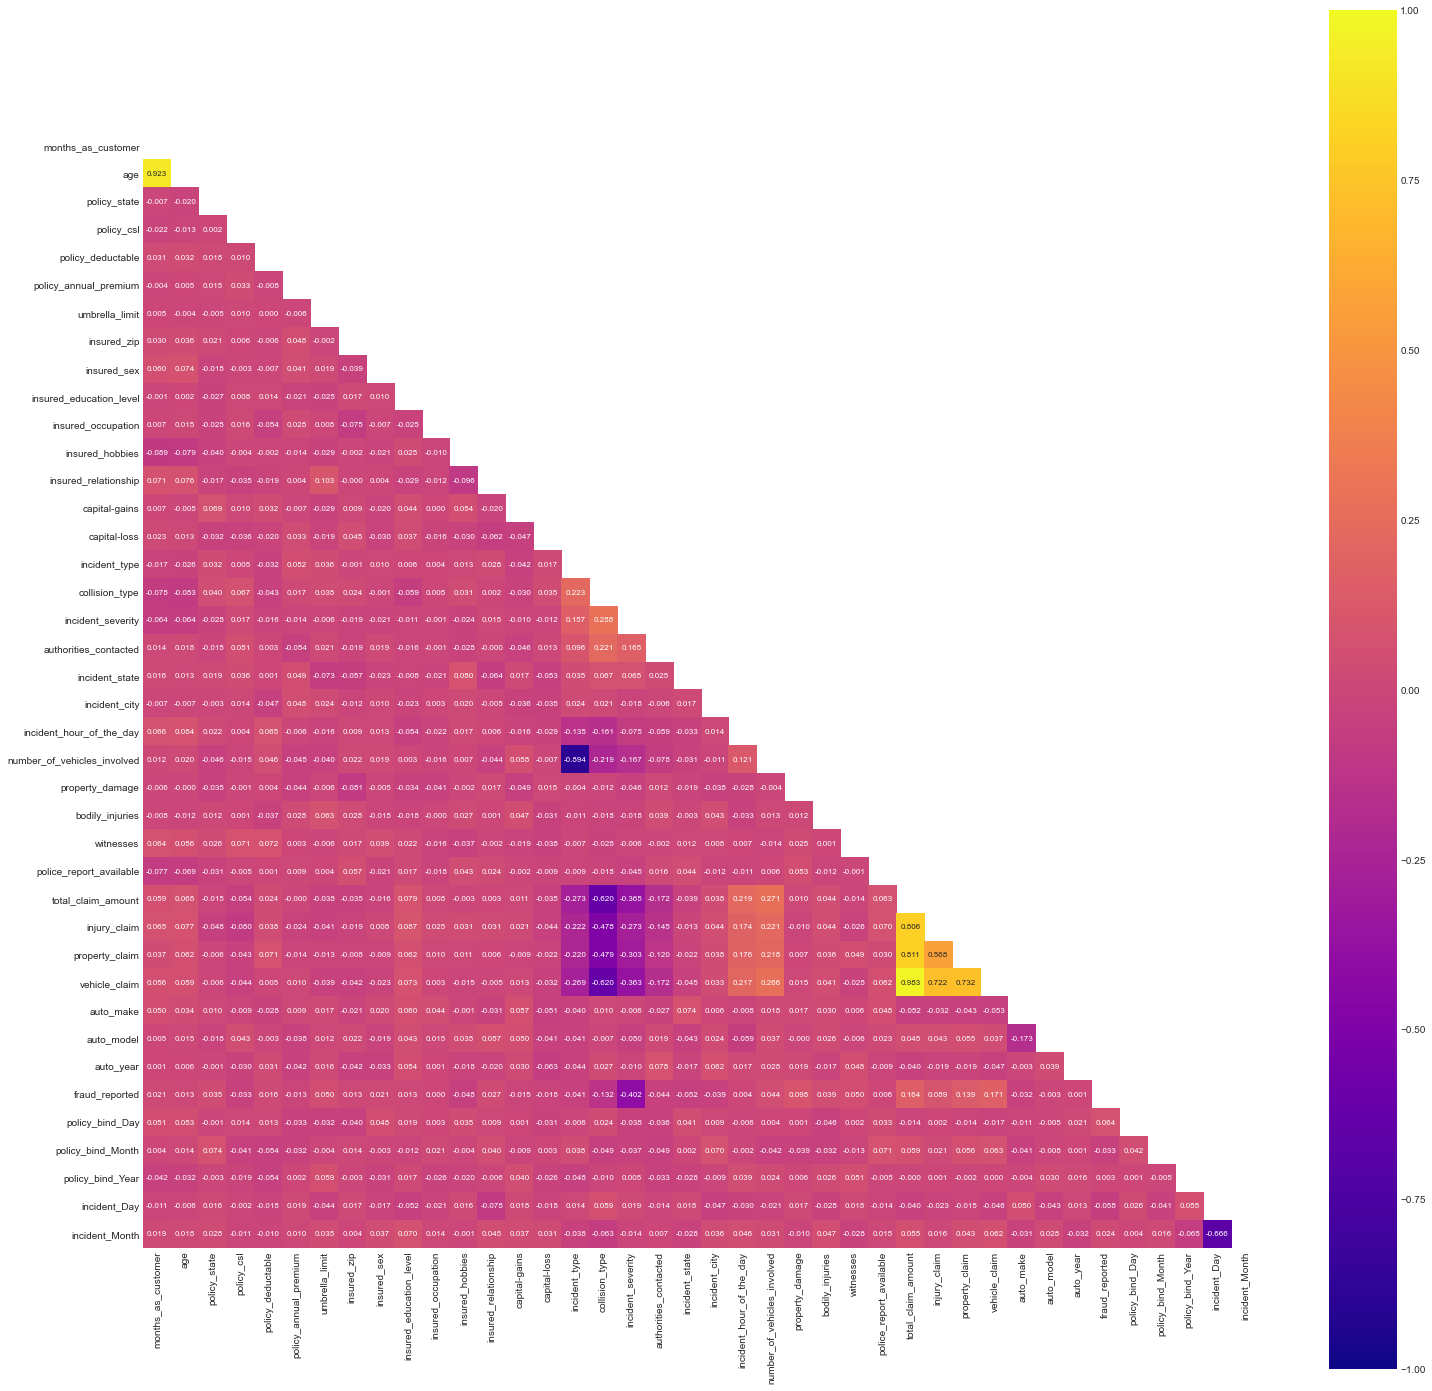

In [43]:
plt.style.use('seaborn-pastel')

upper_triangle = np.triu(df.corr())
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',
            annot_kws={'size':8}, cmap="plasma", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In the above heat map we can see that we are unable to see the correlation but there are few columns are multicolinearity.

Corelation bar plot comparing features with our labels

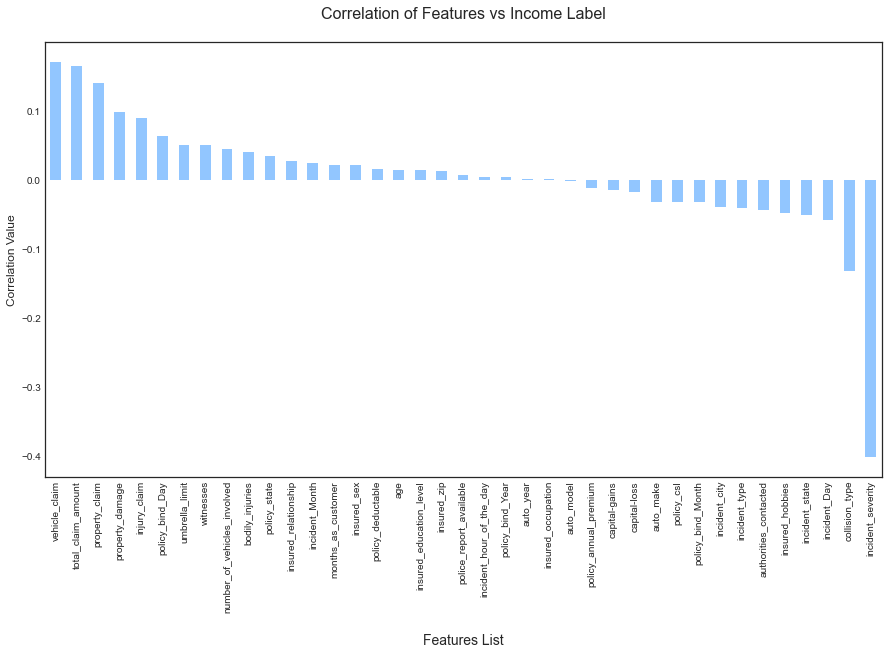

In [44]:
plt.style.use('seaborn-white')

df_corr = df.corr()
plt.figure(figsize=(15,8))
df_corr['fraud_reported'].sort_values(ascending=False).drop('fraud_reported').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Since heat map not gives us a clear picture on positive and negative correlation columns we have generated this bar plot.we see that half of the features columns are positively correlated with our target column,rest of featrures are negatively correlated with our target columns.

In [45]:
df.dropna(inplace=True)

We ensure that no null values present in our dataframe.

Splitting the dataset into 2 variables

In [46]:
X = df.drop('fraud_reported', axis=1)
Y = df['fraud_reported']

In [47]:
Y.value_counts()

0    739
1    240
Name: fraud_reported, dtype: int64

We see there is huge number of imbalance in the data.

In [48]:
oversample = SMOTE()
X , Y = oversample.fit_resample(X,Y)

Here we use over sample method in smote to solve the data imbalance issue

In [49]:
Y.value_counts()

0    739
1    739
Name: fraud_reported, dtype: int64

Here we see that we can slove the dat imblance issure by using over sampling technique.

Feature scaling

In [50]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month
0,1.087134,1.021552,1.220340,0.081282,-0.278401,0.625744,-0.540695,-0.513245,1.104937,0.553102,-1.208704,1.347261,-1.529544,1.037693,0.970009,0.836522,0.724879,-1.032472,1.299999,0.392860,-0.998031,-0.989056,-0.799828,-0.073345,0.123361,0.591764,0.020324,0.655128,-0.245836,1.110303,0.685155,0.929585,-1.739690,-0.168013,0.158594,1.161705,1.824706,1.256106,-0.730958
1,0.193369,0.347560,-0.058651,0.081282,1.434641,-0.276764,2.098311,-0.478979,1.104937,0.553102,-0.158058,0.978920,-0.270732,-0.896421,0.970009,1.827622,1.748782,0.051759,1.299999,0.887721,1.076640,-0.533801,-0.799828,1.203223,-1.151656,-1.328385,1.300647,-2.037183,-1.487483,-1.510324,-2.055941,0.397608,-0.686230,0.356614,1.360042,-0.099173,0.673285,0.849196,-0.730958
2,-0.646771,-1.112755,1.220340,-1.247162,1.434641,0.652558,2.098311,-1.133614,-1.029476,1.642870,1.155249,-1.415296,0.358674,0.377264,0.970009,-1.145679,-0.299024,0.051759,1.299999,-1.091724,-0.998031,-0.685553,1.281414,-1.349914,1.398378,1.551839,-1.259999,-0.840330,0.012027,-0.853026,-0.950360,-0.666346,1.037613,0.356614,-0.802564,-0.099173,-0.190281,0.950924,-0.405059
3,0.443623,0.235228,-1.337642,0.081282,1.434641,0.663749,2.129504,1.569128,-1.029476,1.642870,-1.471365,-1.415296,0.988080,0.878029,-1.263545,0.836522,-1.322927,-1.032472,1.299999,-0.596862,-1.516699,-0.989056,-0.799828,1.203223,0.123361,0.591764,-1.259999,0.322939,-0.282674,-0.319909,0.608402,-0.932334,1.420690,1.580746,1.119753,-0.414392,-1.629557,-1.185351,2.202134
4,0.193369,0.572224,-1.337642,1.409726,-0.278401,1.387555,2.129504,1.602399,1.104937,-1.626435,1.155249,-1.415296,0.988080,1.498541,-0.676521,1.827622,1.748782,0.051759,-0.088667,-1.091724,-1.516699,1.287221,-0.799828,-1.349914,-1.151656,-0.368310,-1.259999,-1.979323,-1.374803,-1.538157,-1.997248,-1.730300,1.133383,0.706366,-1.162998,-0.099173,1.824706,0.442287,-0.405059


I am scaling my feature data to ensure that tere is no issue with the data biasness over a particular period.

Finding best random state for building classification models

In [51]:
maxAccu=0
maxRS=0

for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=i)
    lr = LogisticRegression()
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test,pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i
        
print("Best accuracy score is",maxAccu,"on Random State",maxRS)

Best accuracy score is 82.70270270270271 on Random State 213


WE TAKE 258 IN THE RANGE BETWWEN 1-1000

FEATURE IMPORTANCE BAR GRAPH

In [52]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
importances = pd.DataFrame({'Features':X.columns,'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances

,Importance
Features,
incident_severity,0.218
insured_hobbies,0.048
insured_zip,0.037
vehicle_claim,0.035
total_claim_amount,0.032
policy_csl,0.031
collision_type,0.030
property_damage,0.030
incident_state,0.029


with the help of randomforestclassifier we are able to list down the importance or priority given to a column as per its involvement.

MACHINE LEARNING MODEL FOR CLAASSIFICATION WITH EVALUTION MATRICS

In [53]:
def classify(model,X,Y):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=258)
    
    model.fit(X_train,Y_train)
    
    pred = model.predict(X_test)
    
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n",class_report)
    
    acc_score = (accuracy_score(Y_test,pred))*100
    print("Accuracy Score:",acc_score)
    
    cv_score = (cross_val_score(model,X,Y,cv=5).mean())*100
    print("Cross Validation Score:",cv_score)
    
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is",result)

I have defined the class with the help of train test split ,training of machine learning model.

In [54]:
#Logistic Regression

model=LogisticRegression()
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79       189
           1       0.77      0.85      0.81       181

    accuracy                           0.80       370
   macro avg       0.80      0.80      0.80       370
weighted avg       0.80      0.80      0.80       370

Accuracy Score: 80.0
Cross Validation Score: 74.02290426019239

Accuracy Score - Cross Validation Score is 5.977095739807609


In [55]:
#support vector classifier

model=SVC(C=1.0,kernel='rbf',gamma='auto',random_state=42)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       189
           1       0.85      0.93      0.89       181

    accuracy                           0.89       370
   macro avg       0.89      0.89      0.89       370
weighted avg       0.89      0.89      0.89       370

Accuracy Score: 88.64864864864866
Cross Validation Score: 85.3268437929455

Accuracy Score - Cross Validation Score is 3.3218048557031636


In [56]:
#DecisionTreeClassifier


model=DecisionTreeClassifier(random_state=21,max_depth=15)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       189
           1       0.79      0.82      0.80       181

    accuracy                           0.81       370
   macro avg       0.81      0.81      0.81       370
weighted avg       0.81      0.81      0.81       370

Accuracy Score: 80.54054054054053
Cross Validation Score: 83.4273934951901

Accuracy Score - Cross Validation Score is -2.8868529546495694


In [57]:
#RandomForestClassifier


model=RandomForestClassifier(max_depth=15,random_state=111)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       189
           1       0.88      0.96      0.92       181

    accuracy                           0.91       370
   macro avg       0.92      0.91      0.91       370
weighted avg       0.92      0.91      0.91       370

Accuracy Score: 91.35135135135135
Cross Validation Score: 86.34379294548786

Accuracy Score - Cross Validation Score is 5.007558405863492


In [58]:
#KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.17      0.29       189
           1       0.53      0.99      0.69       181

    accuracy                           0.57       370
   macro avg       0.75      0.58      0.49       370
weighted avg       0.76      0.57      0.49       370

Accuracy Score: 57.2972972972973
Cross Validation Score: 58.46014658726523

Accuracy Score - Cross Validation Score is -1.1628492899679301


In [59]:
#ExtraTreesClassifier

model=ExtraTreesClassifier()
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       189
           1       0.88      0.97      0.92       181

    accuracy                           0.92       370
   macro avg       0.92      0.92      0.92       370
weighted avg       0.93      0.92      0.92       370

Accuracy Score: 92.16216216216216
Cross Validation Score: 89.99312872194227

Accuracy Score - Cross Validation Score is 2.1690334402198914


In [60]:
#XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       189
           1       0.87      0.95      0.91       181

    accuracy                           0.91       370
   macro avg       0.91      0.91      0.91       370
weighted avg       0.91      0.91      0.91       370

Accuracy Score: 90.81081081081082
Cross Validation Score: 87.0190105359597

Accuracy Score - Cross Validation Score is 3.791800274851127


HYPER PARAMETER TUNING ON THE BEST CLASSIFICATION ML MODEL

In [61]:
fmod_param = {'criterion' : ['gini', 'entropy'],
             'n_jobs':[-2, -1, 1],
             'random_state':[42, 258, 1000],
             'max_depth':[30,40,50],
             'n_estimators':[300,400,500] 
             }

After comparing all the classifiaction model i have selected to extra trees classifier as my best model considering the accuracy score with the cross validation score against it

In [62]:
GSCV = GridSearchCV(ExtraTreesClassifier(),fmod_param,cv=5)

In [63]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 40, 50],
                         'n_estimators': [300, 400, 500], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 258, 1000]})

I have trained the grid search cv with the list of parameters i feel it should come best possible outcomes

In [64]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'n_estimators': 400,
 'n_jobs': -2,
 'random_state': 1000}

here provides the best parameters

In [69]:
Final_Model = ExtraTreesClassifier(criterion='entropy',max_depth=30,n_estimators=400,n_jobs=-2,random_state=1000)
Classifier = Final_Model.fit(X_train,Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test,fmod_pred))*100
print("Accuracy score for the Best Model is:",fmod_acc)

Accuracy score for the Best Model is: 91.62162162162161


I  have sucessfully incorporated the hyper parameter turning on my final model and received the accuracy score for it.

AOC ROC Curve

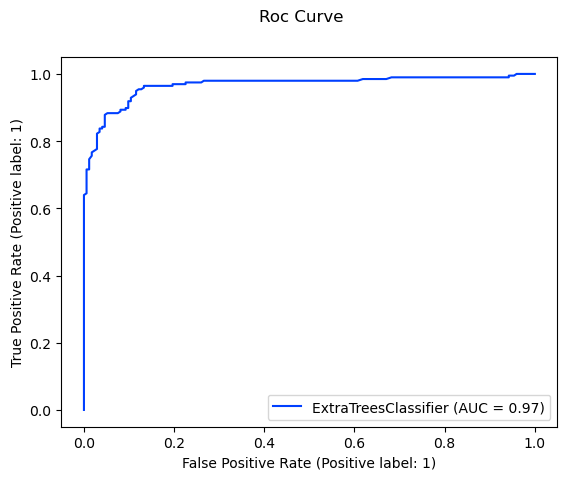

In [70]:
plt.style.use('seaborn-bright')
disp=metrics.plot_roc_curve(Final_Model,X_test,Y_test)
disp.figure_.suptitle("Roc Curve")
plt.show()

I have generated the roc curve for my final model and its shows the auc score for my model to be 97%.

CONFUSION MATRIX

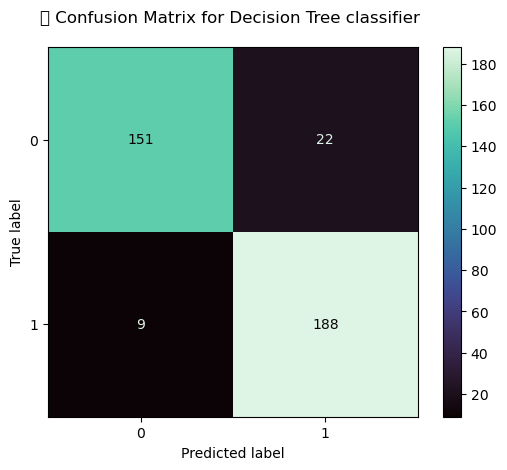

In [71]:
plt.style.use('default')
class_names = df.columns
metrics.plot_confusion_matrix(Classifier,X_test,Y_test,cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree classifier \n')
plt.show()

With the help of confusion matrix i am able to understand the numbers of times i got the correct outputs .

In [72]:
filename = "FinalModel_E08.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_E08.pkl']

Finally i saving my best classification model by using joblib